* Heart disease is a leading cause of mortality worldwide, and I have personally seen its effects on family members and friends. By working on this dataset, I hope to contribute to research that could improve early diagnosis and preventive care.

* The dataset offers insights into important risk factors for heart disease and allows us to build predictive models that can help in early detection and intervention.

* It provides a balanced mix of numerical and categorical features, making it an excellent dataset for applying various machine learning techniques such as Logistic Regression, Decision Trees, and XGBoost. Additionally, handling imbalanced data (as patients without heart disease outnumber those with it) is a relevant data science challenge.

Dataset link : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

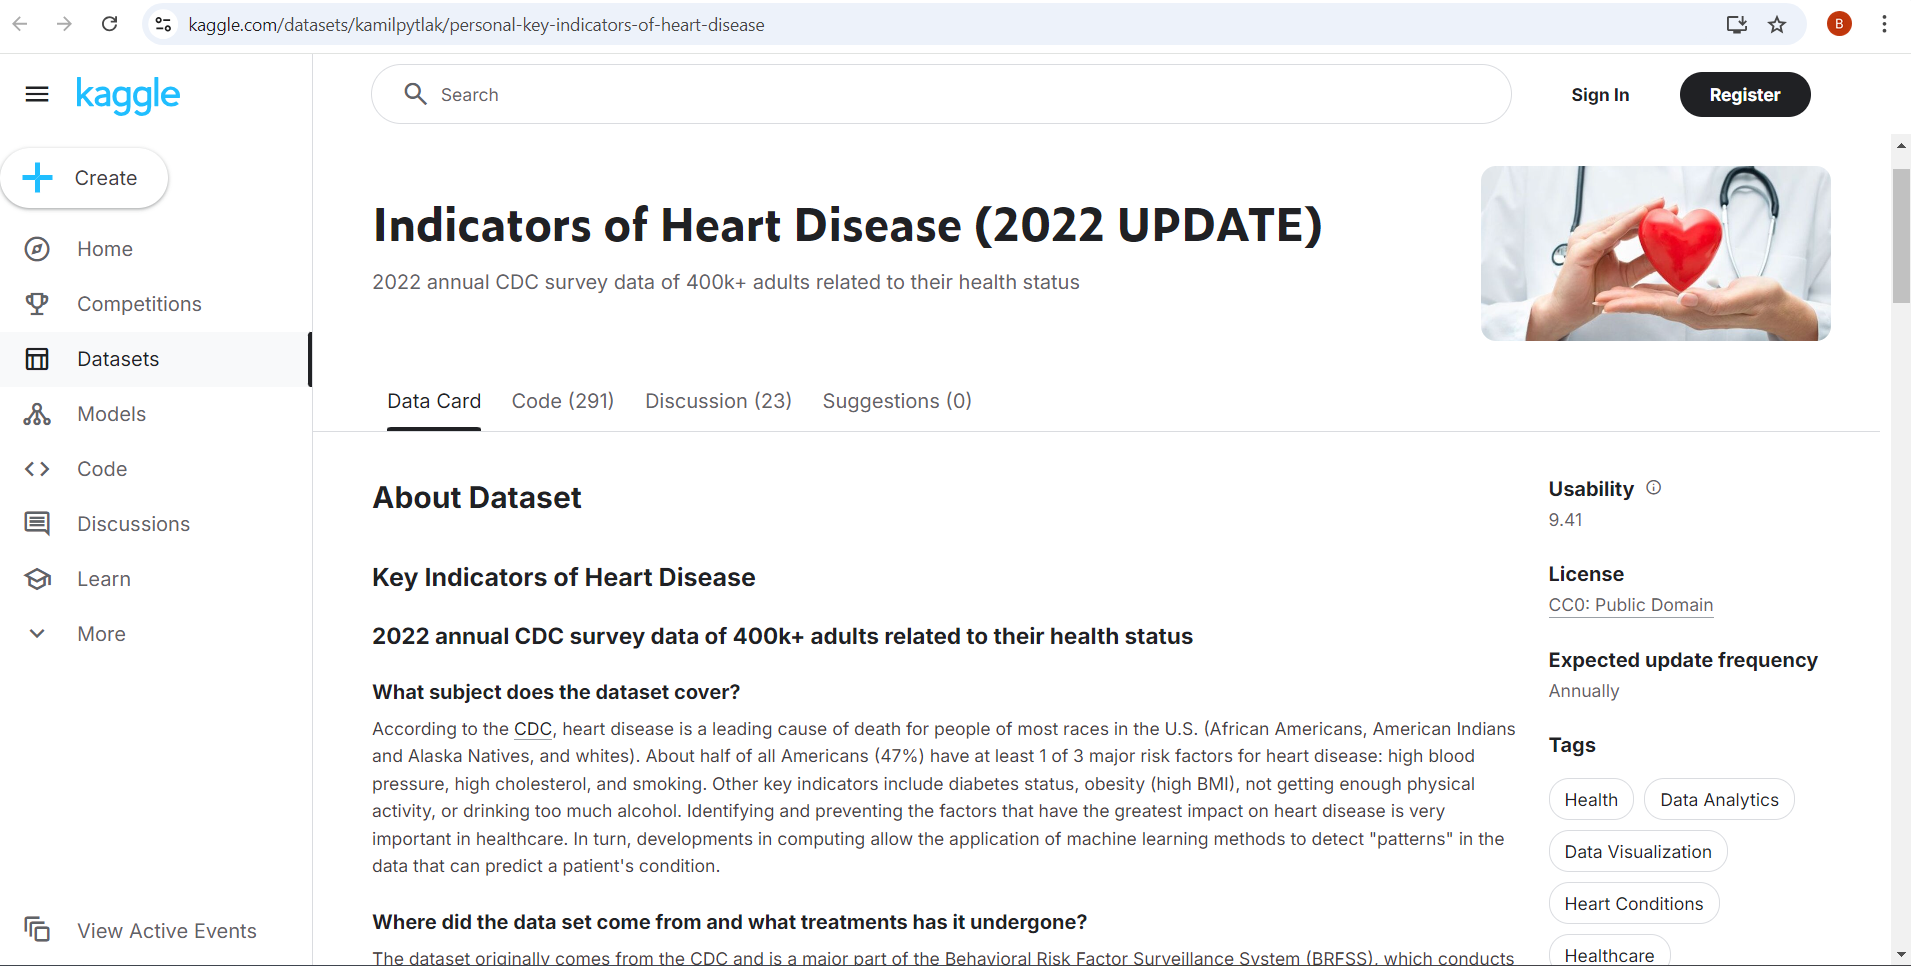

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/heart_2022_no_nans.csv')
df.shape

(246022, 40)

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [20]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# **Visualising the Data**

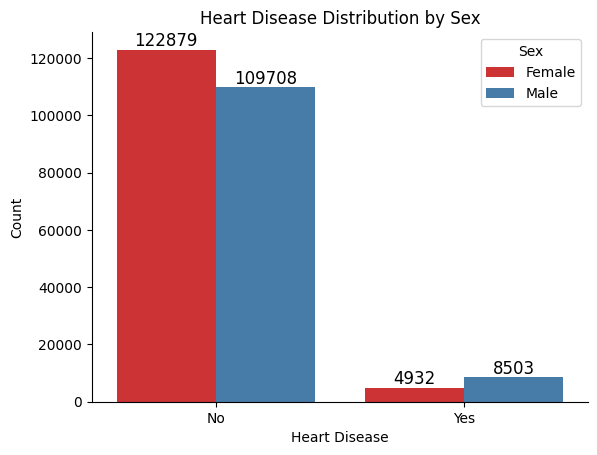

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HadHeartAttack', hue='Sex', palette='Set1')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Sex')
sns.despine(right=True)
plt.show()

### The plot above describes bar plot for the Heat Attack yes and no for Male and Female categories. It can be seen from above that Heart Attack was more prevalent in Male categories compared to Female.

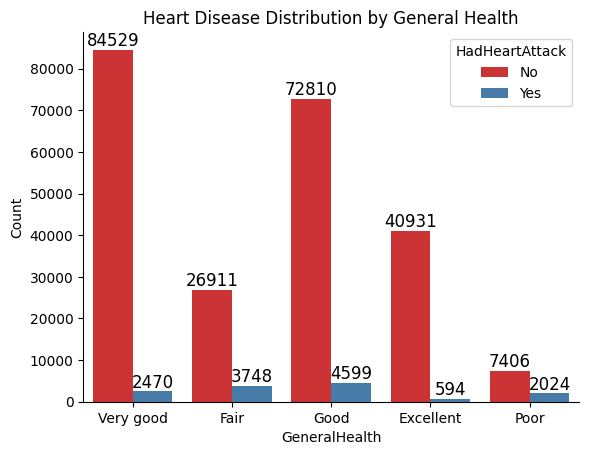

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='GeneralHealth',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge', fontsize=12, color='black')
plt.title('Heart Disease Distribution by General Health')
plt.xlabel('GeneralHealth')
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

In [23]:
df_health = df.groupby(['GeneralHealth','HadHeartAttack']).size().reset_index(name='count')
df_total = df.groupby('GeneralHealth').size().reset_index(name='total')

df_health = pd.merge(df_health,df_total,on='GeneralHealth')
df_health['percentage']=(df_health['count']/df_health['total'])*100
df_health.drop(['total','count'],axis=1,inplace=True)
df_health = df_health[df_health['HadHeartAttack']=='Yes']
df_health

GeneralHealth HadHeartAttack  percentage
1     Excellent            Yes    1.430464
3          Fair            Yes   12.224795
5          Good            Yes    5.941170
7          Poor            Yes   21.463415
9     Very good            Yes    2.839113

1. The plot above describes count of individuals who have or have not experienced the Heart attack amongst General Health categories.
2. It can be observed that the count of individuals with most number of heart attacks is in Good Health category contraty to popular opinion of Poor Health category being most vulnerable to heart attackes.
3. It can also be observed that most number of individuals with no heath attacks fall into the Very_Good health category with Heart attack rates being third in the categories.



In [24]:
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

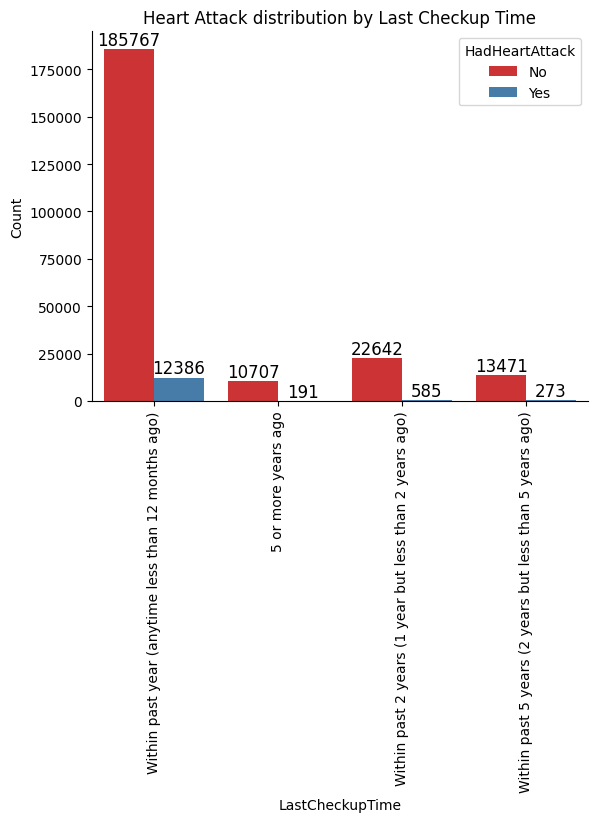

In [25]:
# Plotting LastCheckupTime with Had Heart attack category
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.countplot(data=df,x='LastCheckupTime',hue='HadHeartAttack', palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge', fontsize=12,color='black')
plt.title('Heart Attack distribution by Last Checkup Time')
plt.xlabel('LastCheckupTime')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

1. Most individuals who did not have a heart attack had their checkup within the past year (shown by the large red bar with the value 185,767).

2. A significant number of individuals who had a heart attack also had a recent checkup (12,386 individuals had their last checkup within the past year).

3. Categories such as "5 or more years ago" and "Within past 2 years but less than 5 years ago" have significantly lower counts.

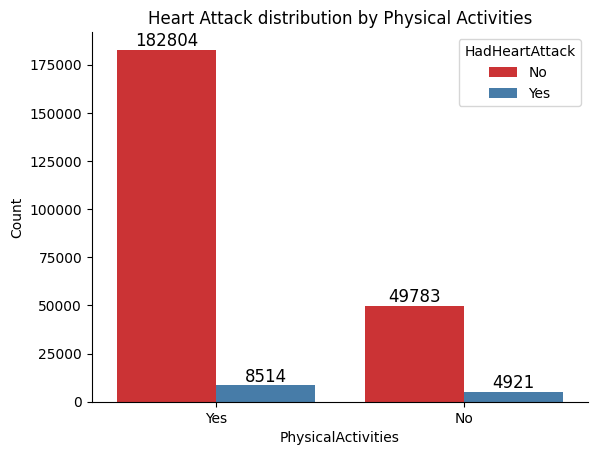

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='PhysicalActivities', hue='HadHeartAttack', palette='Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('Heart Attack distribution by Physical Activities')
plt.xlabel('PhysicalActivities')
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

From the plot above it can be observed that most individuals who did not have a heart attack were physically active. It can also be observed that the data shows people who were physically more active also had more number of heart attacks as per the data.

In [27]:
#Sleep categories with most number of heart attacks
df_sleep = df.groupby(['SleepHours','HadHeartAttack']).size().reset_index(name='count')
df_sleep.sort_values(by='SleepHours',inplace=True)
df_sleep_yes = df_sleep[df_sleep['HadHeartAttack'] == 'Yes']
df_sleep_yes =df_sleep_yes.sort_values(by='count',ascending=False)
df_sleep_yes = df_sleep_yes.head(5)


In [28]:
#Highest Sleep categories with no heart attacks
df_sleep_no = df_sleep[df_sleep['HadHeartAttack']=='No']
df_sleep_no =df_sleep_no.sort_values(by='count',ascending=False)
df_sleep_no = df_sleep_no.head(5)

In [29]:
df_sleep_both = pd.merge(df_sleep_yes,df_sleep_no,on = 'SleepHours')
#df_sleep_both

df_sleep_both.rename(columns={'count_x':'Yes', 'count_y':'No'},inplace=True)
df_sleep_both

SleepHours HadHeartAttack_x   Yes HadHeartAttack_y     No
0         8.0              Yes  3815               No  66112
1         7.0              Yes  2926               No  73521
2         6.0              Yes  2831               No  51150
3         5.0              Yes  1116               No  15301
4         9.0              Yes   797               No  11062

In [30]:
df_melted = pd.melt(df_sleep_both, id_vars=['SleepHours'], value_vars=['Yes','No'],var_name='HadHeartAttack', value_name='Count')
df_melted = df_melted.sort_values(by='SleepHours', ascending=False)
df_melted

SleepHours HadHeartAttack  Count
4         9.0            Yes    797
9         9.0             No  11062
0         8.0            Yes   3815
5         8.0             No  66112
1         7.0            Yes   2926
6         7.0             No  73521
2         6.0            Yes   2831
7         6.0             No  51150
3         5.0            Yes   1116
8         5.0             No  15301

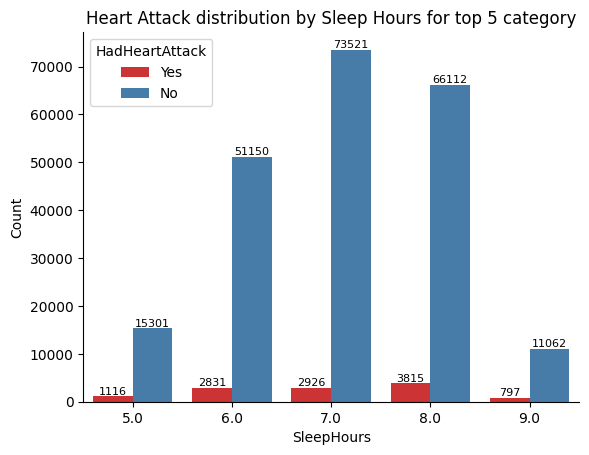

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(data=df_melted,x='SleepHours',y='Count',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=8,color='black')
plt.title('Heart Attack distribution by Sleep Hours for top 5 category')
plt.xlabel('SleepHours')
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()


1. Most individuals (regardless of heart attack status) get between 6 to 8 hours of sleep.
2. Individuals with 7 or 8 hours of sleep have the highest counts of those who did not have a heart attack (73,521 and 66,112, respectively).
3. Heart attack occurrences are more prevalent among individuals with 7 to 8 hours of sleep, but in much smaller numbers compared to those who did not have heart attacks (e.g., 3,815 for 8 hours of sleep).
4. Fewer heart attacks are observed with very low or high sleep hours (e.g., 1,116 for 5 hours, 797 for 9 hours).

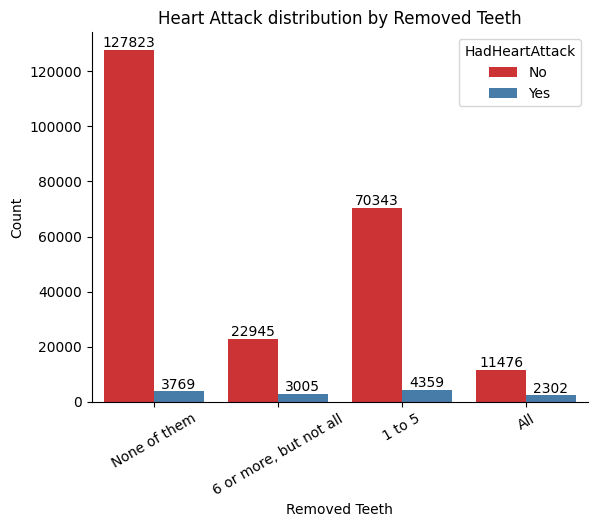

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='RemovedTeeth',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Removed Teeth')
plt.xlabel('Removed Teeth')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The plot above describes the distribution of Removed Teeth and Heart Attack amongst individuals. It was observed that most individuals who did not have a heart attack fell into the None of Them category whereas individuals whose teeths removed were in range from 1 to 5 had maximum individuals with HeartAttack.

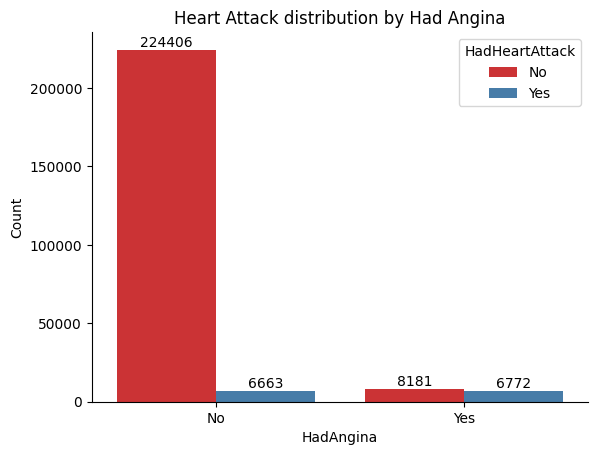

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='HadAngina'  ,hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Had Angina')
plt.xlabel('HadAngina')
plt.ylabel('Count')
sns.despine(right=True)
plt.legend(title='HadHeartAttack')

1. From the plot above it can be observed that most of the individuals fall into the 'No Angina' Category.
2. It can be also observed that individuals who had Angina were more likely to have a Heart Attack.

Text(0, 0.5, 'Count')

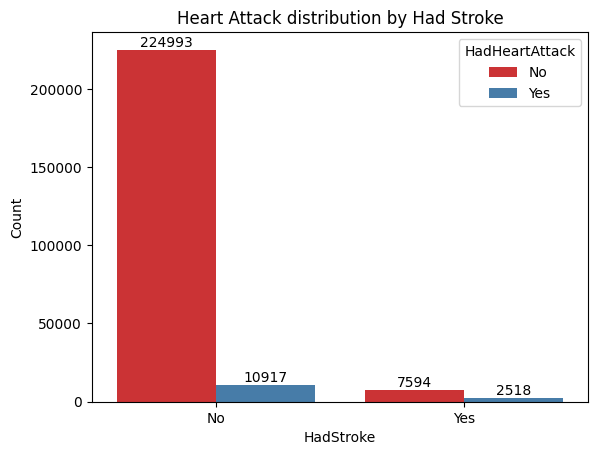

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HadStroke',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Had Stroke')
plt.xlabel('HadStroke')
plt.ylabel('Count')

1. From the plot above it can be observed that most individuals in our data never had a stroke before.
2. It can also be observed that individuals who had a stroke before were more likely to have a heart attack than individuals who never had one.

Text(0, 0.5, 'Count')

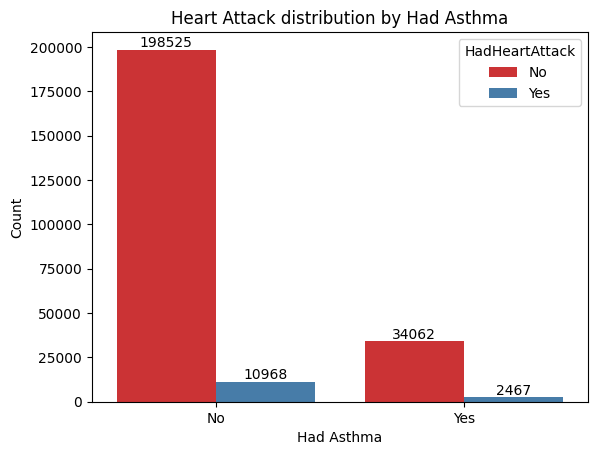

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HadAsthma',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Had Asthma')
plt.xlabel('Had Asthma')
plt.ylabel('Count')

1. A much larger proportion of individuals without asthma did not experience a heart attack.
2. However, among individuals with asthma, heart attack occurrences are relatively higher in proportion compared to the asthma-free group.

Text(0, 0.5, 'Count')

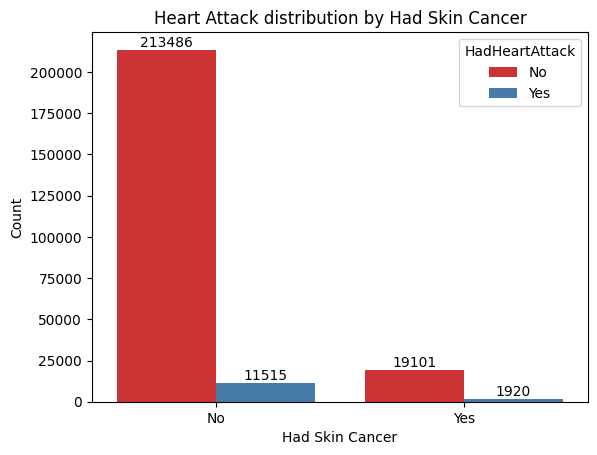

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HadSkinCancer',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Had Skin Cancer')
plt.xlabel('Had Skin Cancer')
plt.ylabel('Count')

1. A much larger proportion of individuals without Skin Cancer did not experience a heart attack.
2. However, among individuals with Skin Cancer, heart attack occurrences are relatively higher in proportion compared to the Skin Cancer free group.

Text(0, 0.5, 'Count')

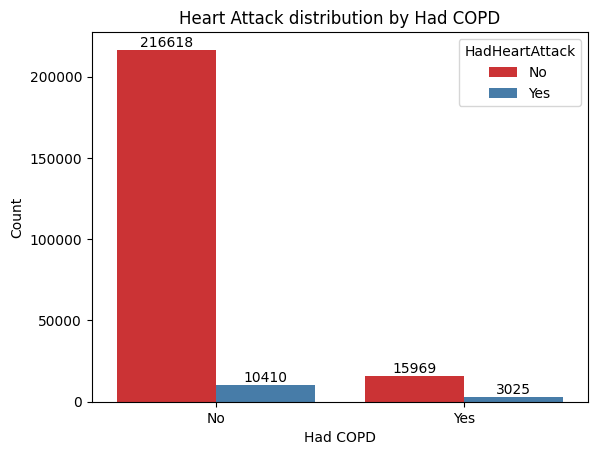

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HadCOPD',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Had COPD')
plt.xlabel('Had COPD')
plt.ylabel('Count')

This bar plot shows the relationship between having COPD (Chronic Obstructive Pulmonary Disease) and the occurrence of heart attacks (HadHeartAttack)
1. The majority of individuals without COPD did not experience a heart attack, but there is still a notable group who did.
2. Among those with COPD, while the total count is smaller, there is a higher proportion of individuals who had a heart attack compared to the no-COPD group.

Text(0, 0.5, 'Count')

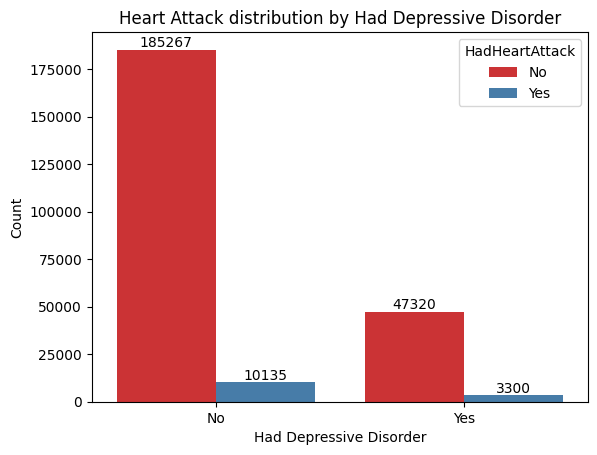

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HadDepressiveDisorder',hue='HadHeartAttack',palette='Set1')
for container in ax.containers:
  ax.bar_label(container,label_type='edge',fontsize=10,color='black')
plt.title('Heart Attack distribution by Had Depressive Disorder')
plt.xlabel('Had Depressive Disorder')
plt.ylabel('Count')

The plot illustrates the relationship between individuals having Depressive order and the occurence of heart attack.
1. It was found that the data mostly contains individuals who didn't have a heart attack.
2. It was also oberved that individuals with a Depressive Disorder were more likely to have a heart attack rather than individuals who didn't have one.

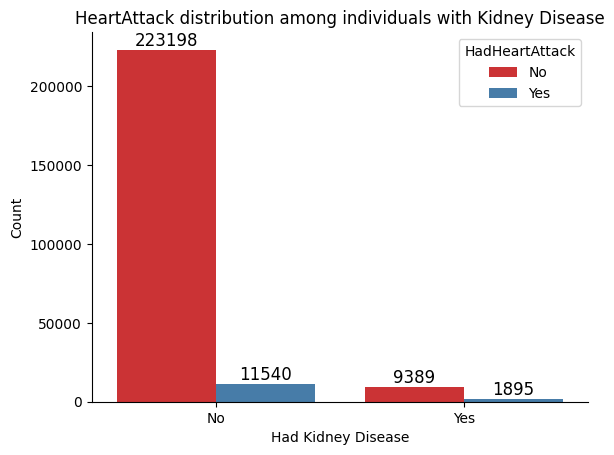

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='HadKidneyDisease',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution among individuals with Kidney Disease')
plt.xlabel('Had Kidney Disease')
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()


The plot illustrates the relationship between individuals having Kidney Disease and the occurence of heart attack.
1. It was found that the data mostly contains individuals who didn't have a Kidney disease did not have a heart attack.
2. It was also oberved that individuals with a Kidney Disease were more likely to have a heart attack rather than individuals who didn't have one.

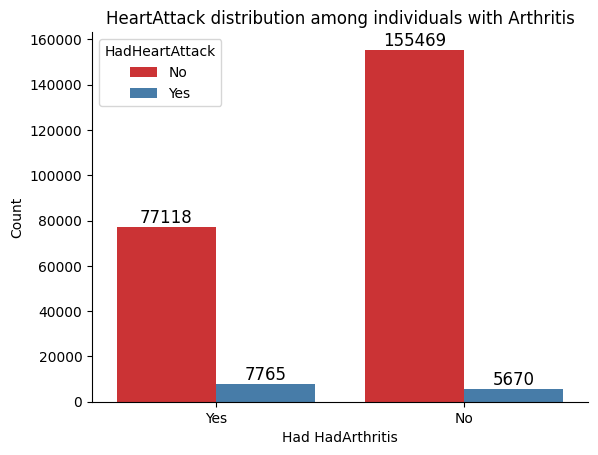

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='HadArthritis',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution among individuals with Arthritis')
plt.xlabel('Had HadArthritis')
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

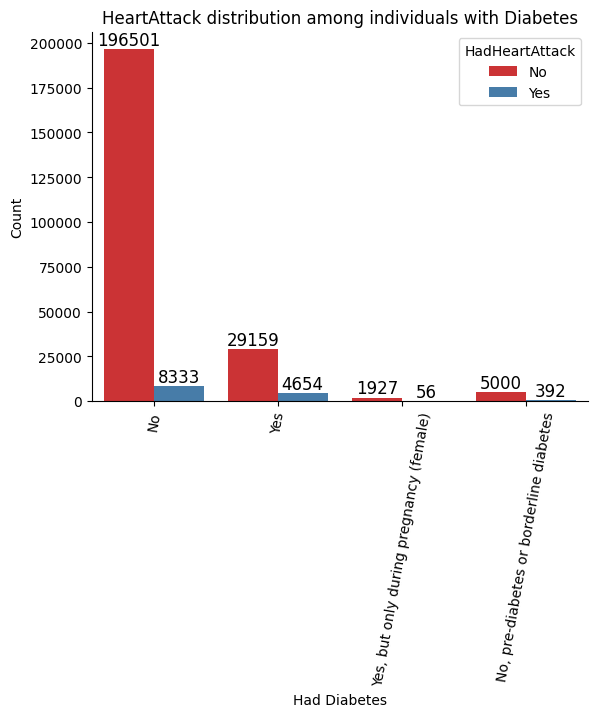

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='HadDiabetes',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution among individuals with Diabetes')
plt.xlabel('Had Diabetes')
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart shows the distribution of heart attacks based on diabetes status. 1. The categories for diabetes include "No," "Yes," "Yes, but only during pregnancy (female)," and "No, pre-diabetes or borderline diabetes."

2. The majority of people without diabetes (196,501) did not have a heart attack, while 8,333 did.

3. Among individuals with diabetes, 29,159 did not experience a heart attack, while 4,654 did.

4. For those who had diabetes only during pregnancy, 1,927 did not have a heart attack, and 56 did.
Among those with pre-diabetes or borderline diabetes, 5,000 did not experience a heart attack, while 392 did.

It was observed that individuals with Diabetes were more likely to have a heart attack.

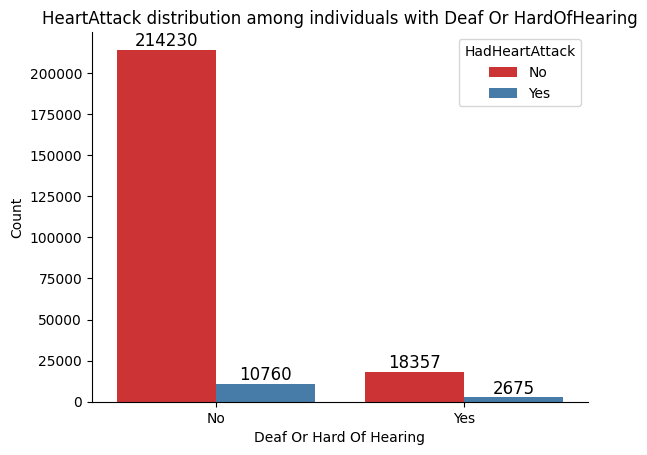

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='DeafOrHardOfHearing',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution among individuals with Deaf Or HardOfHearing')
plt.xlabel('Deaf Or Hard Of Hearing')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The plot illustrates the relationship between individuals having Deaf Or Hard Of Hearing and the occurence of heart attack.
1. It was found that the data mostly contains individuals who didn't have a Deaf Or Hard O fHearing did not have a heart attack.
2. It was also oberved that individuals with a DeafOrHardOfHearing were more likely to have a heart attack rather than individuals who didn't have one.

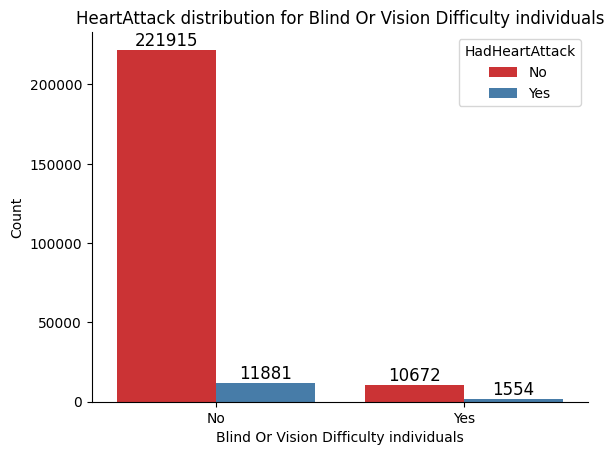

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='BlindOrVisionDifficulty',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for Blind Or Vision Difficulty individuals')
plt.xlabel('Blind Or Vision Difficulty individuals')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The chart shows heart attack distribution for individuals with and without vision difficulties. Key points:
1. A majority (221,915) of individuals without vision difficulty did not have a heart attack, while 11,881 did.
2. For individuals with vision difficulty, 10,672 did not have a heart attack, while 1,554 did.

This highlights that heart attacks are more prevalent among those without vision difficulties.








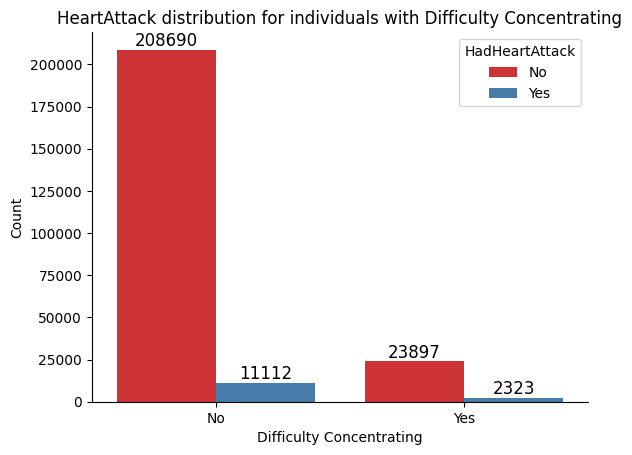

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='DifficultyConcentrating',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for individuals with Difficulty Concentrating')
plt.xlabel('Difficulty Concentrating')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart shows heart attack distribution among individuals with and without difficulty concentrating. Key points:
1. Among individuals without difficulty concentrating, 208,690 did not have a heart attack, while 11,112 did.
2. For those with difficulty concentrating, 23,897 did not have a heart attack, while 2,323 did.

This suggests that individuals with difficulty concentrating have a slightly higher proportion of heart attacks compared to those without this difficulty

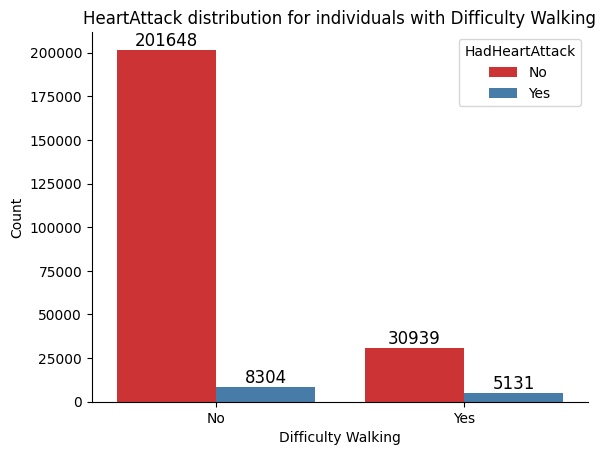

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='DifficultyWalking',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for individuals with Difficulty Walking')
plt.xlabel('Difficulty Walking')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart illustrates heart attack distribution among individuals with and without difficulty walking. Key observations include:

1. For individuals without difficulty walking, 201,648 did not have a heart attack, while 8,304 did.
2. Among individuals with difficulty walking, 30,939 did not have a heart attack, while 5,131 did.

This suggests that individuals with difficulty walking have a higher proportion of heart attacks compared to those without this difficulty.

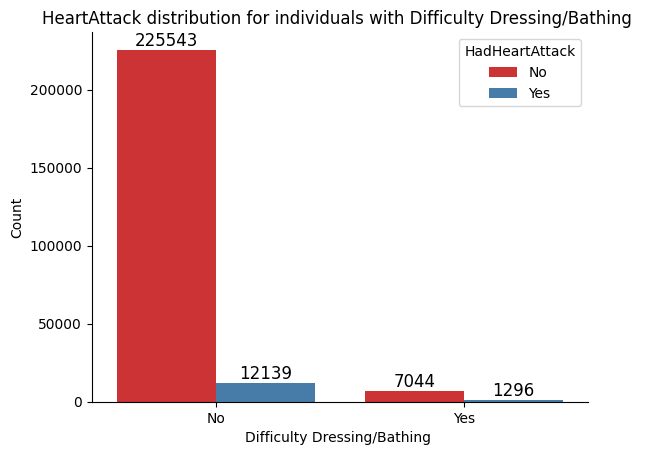

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='DifficultyDressingBathing',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for individuals with Difficulty Dressing/Bathing ')
plt.xlabel('Difficulty Dressing/Bathing ')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart depicts heart attack distribution for individuals with and without difficulty dressing or bathing. Key insights:

1. Among individuals without difficulty dressing/bathing, 225,543 did not have a heart attack, while 12,139 did.
2. For individuals with difficulty dressing/bathing, 7,044 did not have a heart attack, while 1,296 did.

This indicates that individuals with difficulty dressing or bathing show a higher proportion of heart attacks compared to those without such difficulties.

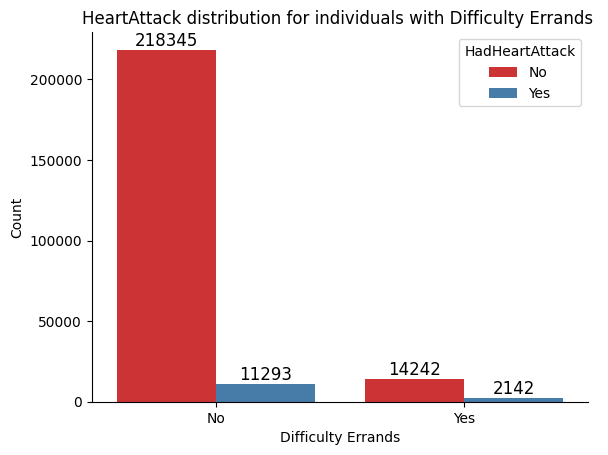

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='DifficultyErrands',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for individuals with Difficulty Errands ')
plt.xlabel('Difficulty Errands')
#plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart shows the heart attack distribution among individuals with and without difficulty running errands. Key insights include:

1. Among individuals without difficulty running errands, 218,345 did not have a heart attack, while 11,293 did.
2. For individuals with difficulty running errands, 14,242 did not have a heart attack, while 2,142 did.

This suggests that individuals with difficulty running errands have a higher proportion of heart attacks compared to those without such difficulties

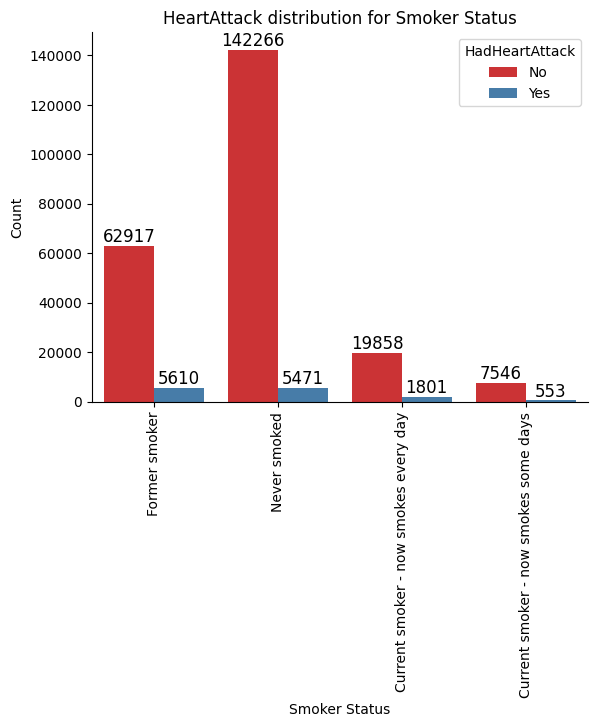

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='SmokerStatus',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for Smoker Status')
plt.xlabel('Smoker Status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart illustrates heart attack distribution based on smoking status. Key insights:

1. Among former smokers, 62,917 did not have a heart attack, while 5,610 did.
For those who never smoked, 142,266 did not have a heart attack, while 5,471 did.
2. Current smokers who smoke every day show 19,858 without heart attacks and 1,801 with heart attacks.
3. For current smokers who smoke some days, 7,546 did not have a heart attack, while 553 did.

This suggests that heart attacks are more common among current smokers compared to those who have never smoked or are former smokers.

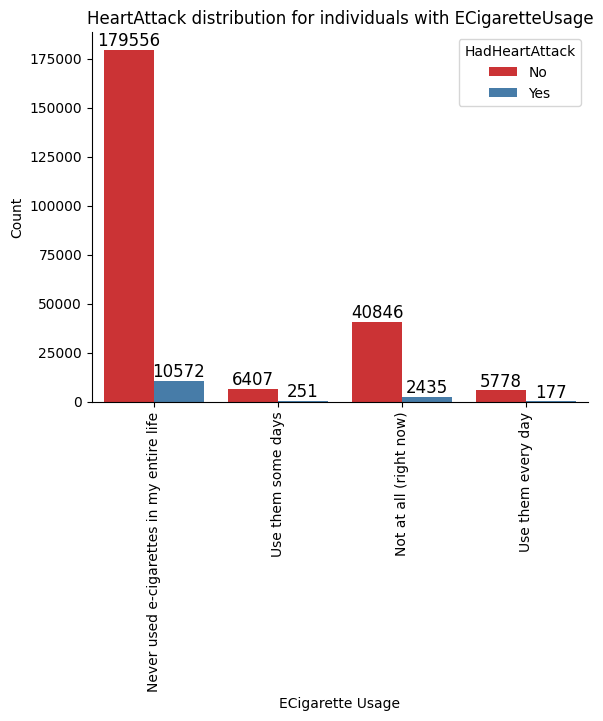

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='ECigaretteUsage',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for individuals with ECigaretteUsage')
plt.xlabel('ECigarette Usage')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart presents the distribution of heart attacks based on individuals' e-cigarette usage. Key observations:

1. Among those who never used e-cigarettes, 179,556 did not have a heart attack, while 10,572 did.
2. For individuals who use e-cigarettes some days, 6,407 did not have a heart attack, while 251 did.
3. Among individuals who do not currently use e-cigarettes, 40,846 did not have a heart attack, while 2,435 did.
4. For those who use e-cigarettes every day, 5,778 did not have a heart attack, while 177 did.

This suggests that individuals who have never used e-cigarettes have a lower proportion of heart attacks compared to those who use or have used e-cigarettes.








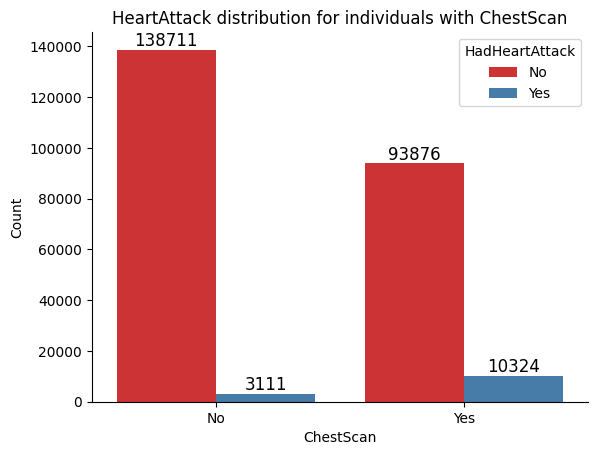

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='ChestScan',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=12,color='black')
plt.title('HeartAttack distribution for individuals with ChestScan')
plt.xlabel('ChestScan')
#plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart illustrates heart attack distribution based on whether individuals have had a chest scan. Key observations:

1. Among individuals who have not had a chest scan, 138,711 did not have a heart attack, while 3,111 did.
2. For individuals who have had a chest scan, 93,876 did not have a heart attack, while 10,324 did.

This suggests that individuals who have undergone a chest scan show a higher proportion of heart attacks compared to those who have not had a chest scan.

In [51]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

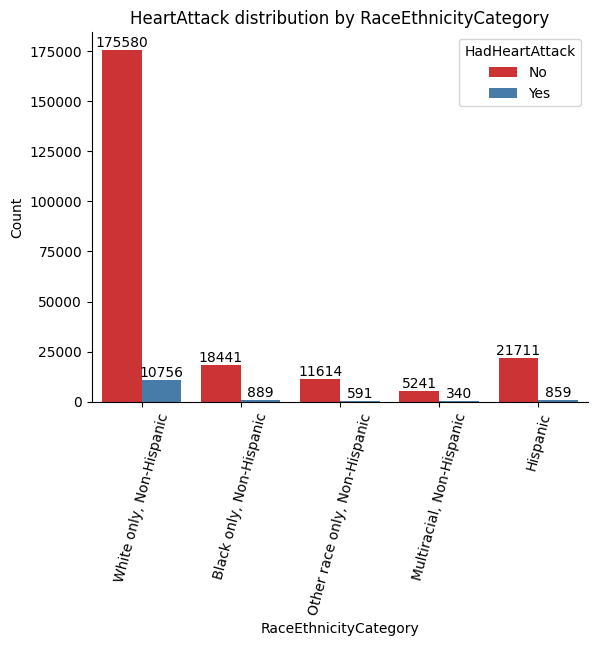

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(data=df,x='RaceEthnicityCategory',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution by RaceEthnicityCategory')
plt.xlabel('RaceEthnicityCategory')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart shows heart attack distribution by race and ethnicity categories. Key insights:

1. White only, Non-Hispanic: 175,580 individuals did not have a heart attack, while 10,756 did.
2. Black only, Non-Hispanic: 18,441 individuals did not have a heart attack, while 889 did.
3. Other race only, Non-Hispanic: 11,614 individuals did not have a heart attack, while 591 did.
4. Multiracial, Non-Hispanic: 5,241 individuals did not have a heart attack, while 340 did.
5. Hispanic: 21,711 individuals did not have a heart attack, while 859 did.

This suggests that heart attack prevalence is higher in certain racial/ethnic groups, with non-Hispanic White individuals showing the highest overall count of heart attacks, although other groups also show notable proportions.








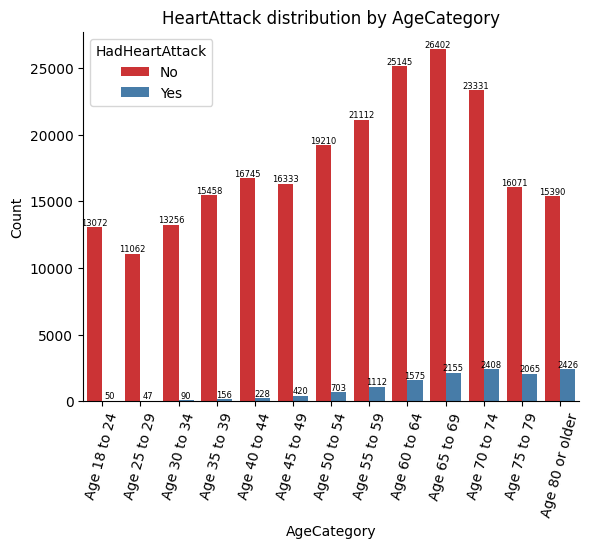

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
df_age = df.sort_values(by='AgeCategory')
ax = sns.countplot(data=df_age,x='AgeCategory',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=6,color='black')
plt.title('HeartAttack distribution by AgeCategory')
plt.xlabel('AgeCategory')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart illustrates heart attack distribution by age category. Key insights:

1. The highest number of heart attacks occurred in the 60 to 64 age group, with 26,402 individuals not having a heart attack and 2,155 having one.
2. The second highest is the 55 to 59 age group, where 25,145 did not have a heart attack, and 1,112 did.
3. Younger age groups (18 to 29) have very low occurrences of heart attacks, while older age groups (80 or older) show increasing rates, with 15,390 individuals not having a heart attack and 2,426 having one.

This suggests that heart attacks are more prevalent in older age categories, particularly between the ages of 55 and 64.

In [54]:
list_height = df['HeightInMeters'].unique()
len(list_height)

101

In [55]:
df_height = df[['HeightInMeters','HadHeartAttack']]
df_height = df_height[df_height['HadHeartAttack'] == 'Yes']
df_height
df_height = df_height.groupby('HeightInMeters').count().reset_index()
df_height = df_height.sort_values(by='HadHeartAttack',ascending=False).head(10)
df_height

HeightInMeters  HadHeartAttack
34            1.78            1323
32            1.75            1146
31            1.73            1106
28            1.70            1098
27            1.68            1097
36            1.83            1095
35            1.80            1004
23            1.63             889
25            1.65             804
21            1.60             700

In [56]:
df_height_No = df[['HeightInMeters','HadHeartAttack']]
df_height_No = df_height_No[df_height_No['HadHeartAttack'] == 'No']
df_height_No = df_height_No.groupby('HeightInMeters').count().reset_index()
df_height_No = df_height_No.sort_values(by='HadHeartAttack',ascending=False).head(10)
df_height_No

HeightInMeters  HadHeartAttack
55            1.68           20597
50            1.63           19946
57            1.70           18956
65            1.78           18217
52            1.65           18021
60            1.73           17398
62            1.75           16295
70            1.83           15841
47            1.60           15787
44            1.57           14835

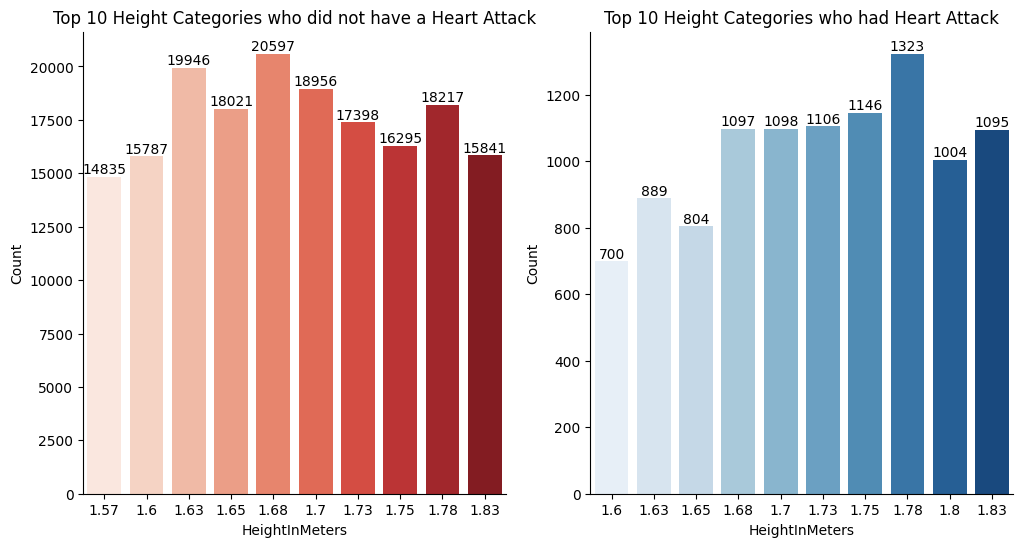

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,2,figsize=(12,6))

ax1 = sns.barplot(data=df_height_No,x='HeightInMeters',y='HadHeartAttack',palette='Reds',ax=axes[0])
for container in ax1.containers:
  ax1.bar_label(container,label_type='edge',fontsize=10,color='black')
axes[0].set_title('Top 10 Height Categories who did not have a Heart Attack')
axes[0].set_xlabel('HeightInMeters')
axes[0].set_ylabel('Count')
sns.despine(right=True,ax=axes[0])

ax2 = sns.barplot(data=df_height,x='HeightInMeters',y='HadHeartAttack',palette='Blues',ax=axes[1])
for containers in ax2.containers:
  ax2.bar_label(containers,label_type='edge',fontsize=10,color='black')
axes[1].set_title('Top 10 Height Categories who had Heart Attack')
axes[1].set_xlabel('HeightInMeters')
axes[1].set_ylabel('Count')
sns.despine(right=True, ax = axes[1])




The chart compares the top 10 height categories for individuals who had a heart attack (left) and those who did not (right).

1.Individuals who had a heart attack:

* The tallest individuals (1.78 meters) have the highest count of heart attacks (1,323).
* The counts decrease for shorter individuals, with the lowest being 700 for individuals at 1.6 meters.

2.Individuals who did not have a heart attack:
* The tallest individuals (1.75 meters and 1.78 meters) also show high counts, with a peak at 20,597 for 1.73 meters.
* Shorter individuals (1.57 meters and 1.6 meters) have lower counts, but not as significantly as in the heart attack group.

Overall, taller individuals seem to have a higher count in both heart attack and no-heart-attack categories, with a more noticeable difference in those who had a heart attack.








In [58]:
list_weight = df['WeightInKilograms'].unique()
len(list_weight)

516

In [59]:
df_weight_yes = df[['WeightInKilograms','HadHeartAttack']]
df_weight_yes = df_weight_yes[df_weight_yes['HadHeartAttack'] == 'Yes']
df_weight_yes
df_weight_yes = df_weight_yes.groupby('WeightInKilograms').count().reset_index()
df_weight_yes = df_weight_yes.sort_values(by='HadHeartAttack',ascending=False).head(10)
#df_weight_yes
df_weight_no = df[['WeightInKilograms','HadHeartAttack']]
df_weight_no = df_weight_no[df_weight_no['HadHeartAttack'] == 'No']
df_weight_no = df_weight_no.groupby('WeightInKilograms').count().reset_index()
df_weight_no = df_weight_no.sort_values(by='HadHeartAttack',ascending=False).head(10)
#df_weight_no

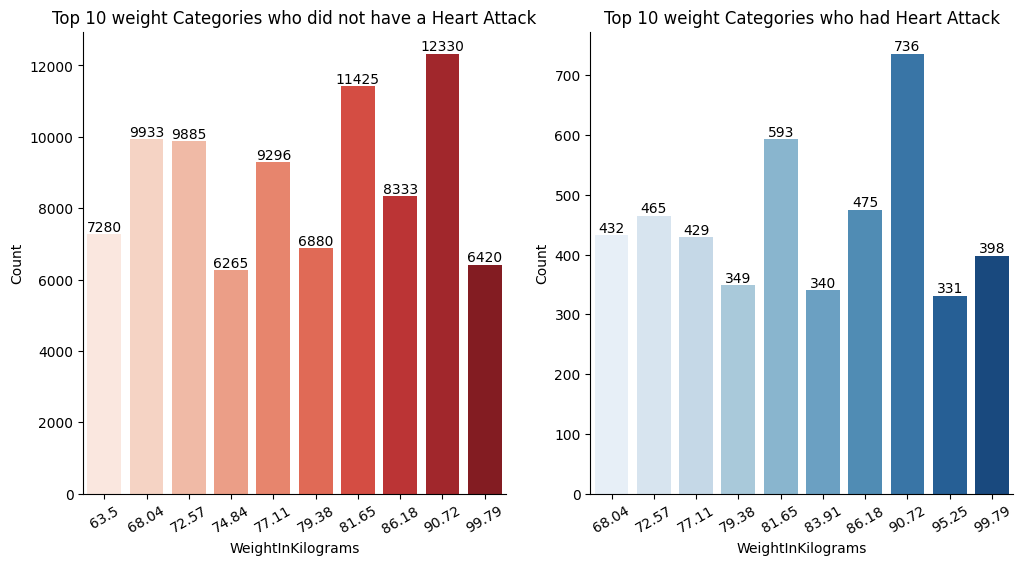

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes = plt.subplots(1,2,figsize=(12,6))

ax1 = sns.barplot(data=df_weight_no,x='WeightInKilograms',y='HadHeartAttack',palette='Reds',ax=axes[0])
for container in ax1.containers:
  ax1.bar_label(container,label_type='edge',fontsize=10,color='black')
axes[0].set_title('Top 10 weight Categories who did not have a Heart Attack')
axes[0].set_xlabel('WeightInKilograms')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30)
axes[0].set_ylabel('Count')
sns.despine(right=True,ax=axes[0])

ax2 = sns.barplot(data=df_weight_yes,x='WeightInKilograms',y='HadHeartAttack',palette='Blues',ax=axes[1])
for containers in ax2.containers:
  ax2.bar_label(containers,label_type='edge',fontsize=10,color='black')
axes[1].set_title('Top 10 weight Categories who had Heart Attack')
axes[1].set_xlabel('WeightInKilograms')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30)
axes[1].set_ylabel('Count')
sns.despine(right=True, ax = axes[1])




The chart compares the top 10 weight categories for individuals who did not have a heart attack (left) and those who did (right).

**Key Insights:**
1. Individuals who did not have a heart attack:
* The weight category 90.72 kg has the highest count of individuals without a heart attack (12,330), followed by 86.18 kg (11,425).
* The weight range for the highest counts is between 77.11 kg and 99.79 kg.

2. Individuals who had a heart attack:
* The weight category 90.72 kg also has the highest count of individuals who had a heart attack (736), followed by 81.65 kg (593).
* The weight range for the highest counts is between 72.57 kg and 99.79 kg, with a noticeable peak in the 90.72 kg group.

**Observations:**
In both groups, individuals in the 90.72 kg weight category show the highest counts.
There is a notable concentration of heart attacks in higher weight categories, suggesting a potential correlation between higher weight and heart attack occurrence.

In [61]:
df['BMI'].unique()

array([27.99, 30.13, 31.66, ..., 38.8 , 58.95, 45.28])

In [62]:
# We will convert the BMI data into categories for the purpose of visualisation
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif 30 <= bmi < 34.9:
        return 'Obesity class I'
    elif 35 <= bmi < 39.9:
        return 'Obesity class II'
    else:
        return 'Obesity class III'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

df_bmi = df[['BMI_Category','HadHeartAttack']]

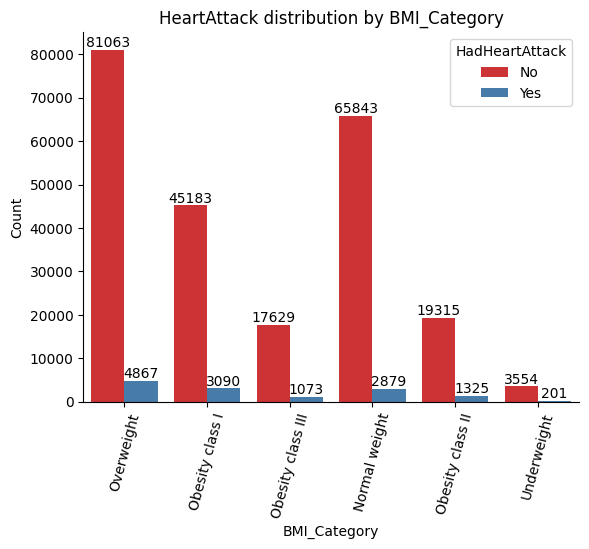

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df_bmi,x='BMI_Category',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution by BMI_Category')
plt.xlabel('BMI_Category')
plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

1. Overweight and Obesity Class I categories show the highest number of heart attacks, indicating a higher risk of heart attack with increasing weight.
2. Normal weight individuals have a lower proportion of heart attacks compared to the overweight and obese categories.
3. Underweight individuals show the lowest heart attack count, but this could be due to a smaller sample size.

This distribution illustrates a clear pattern where individuals with higher BMI categories (especially overweight and obesity classes) are more prone to heart attack

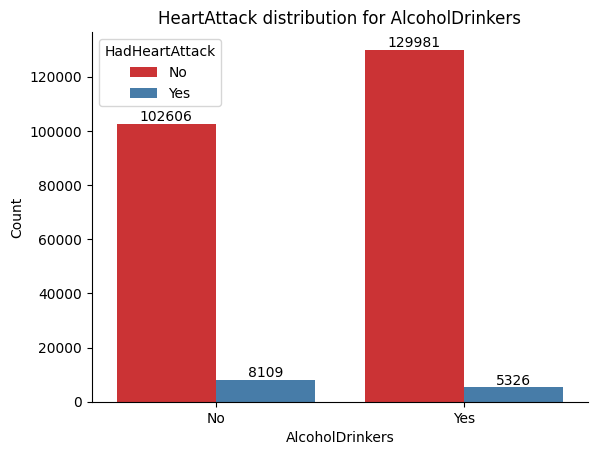

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='AlcoholDrinkers',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for AlcoholDrinkers')
plt.xlabel('AlcoholDrinkers')
#plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

Both drinkers and non-drinkers show a higher number of individuals who did not experience a heart attack. However, the proportion of heart attacks among non-drinkers appears to be slightly higher than among drinkers, though the difference is relatively small.

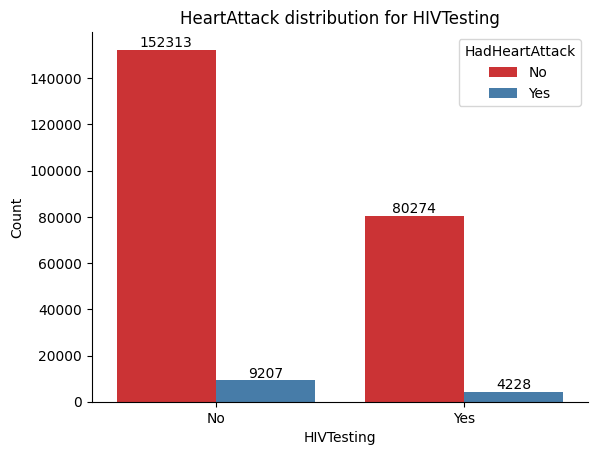

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HIVTesting',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for HIVTesting')
plt.xlabel('HIVTesting')
#plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart illustrates heart attack distribution based on whether individuals have had HIV testing.

1. Among individuals who have not been HIV tested, 152,313 did not have a heart attack, while 9207 did.
2. For individuals who have been HIV tested, 80,274 did not have a heart attack, while 4228 did.

This suggests that individuals who have been HIV tested show a higher proportion of heart attacks compared to those who have not been HIV tested.

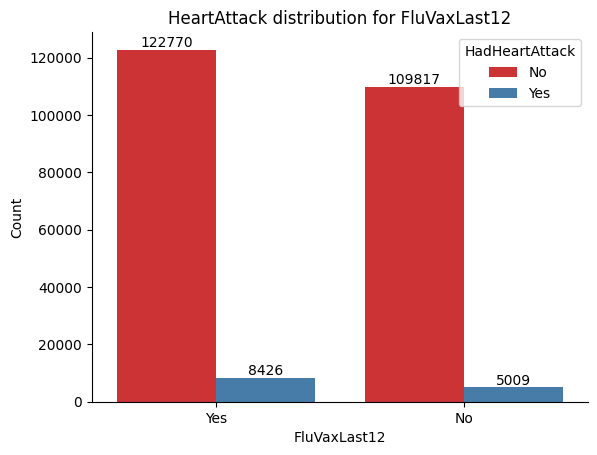

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='FluVaxLast12',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for FluVaxLast12')
plt.xlabel('FluVaxLast12')
#plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The bar chart illustrates heart attack distribution based on whether individuals have had FLu Vax in last 12 months

1. Among individuals who did not have FluVax in 12 months 122,770 did not have a heart attack, while 84206 did.
2. For individuals who had FluVax in 12 months, 109817 did not have a heart attack, while 5009 did.

The data shows that individuals who received a flu vaccine have a slightly higher count of heart attacks compared to those who did not. However, in both groups, the vast majority did not experience a heart attack.

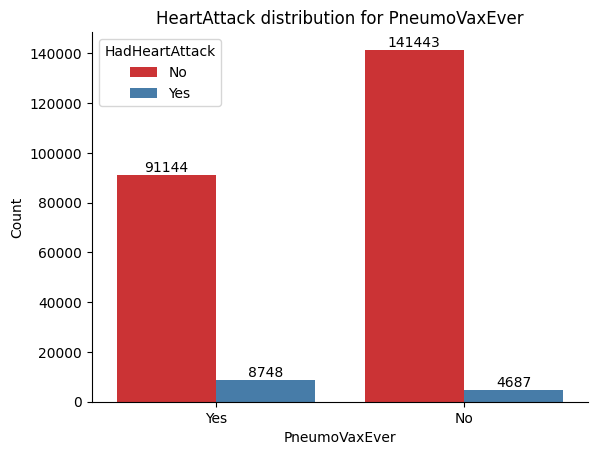

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='PneumoVaxEver',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for PneumoVaxEver')
plt.xlabel('PneumoVaxEver')
#plt.xticks(rotation=75)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

Individuals who have never received the pneumococcal vaccine show a higher count of no heart attacks but a lower count of heart attacks compared to those who have been vaccinated. The vaccinated group shows a relatively higher proportion of heart attacks.

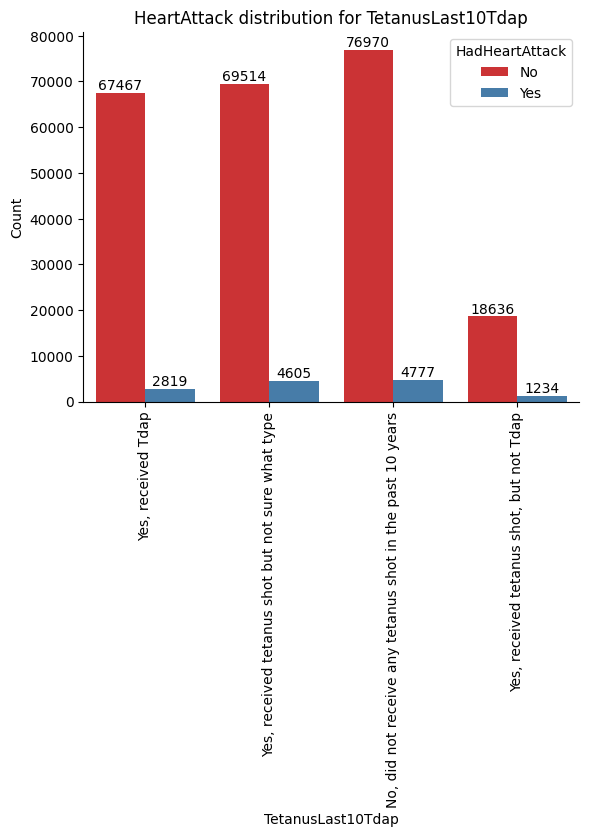

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='TetanusLast10Tdap',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for TetanusLast10Tdap')
plt.xlabel('TetanusLast10Tdap')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

The chart shows that most individuals, regardless of the type of tetanus shot received or whether they had one at all, did not experience a heart attack. However, the proportion of heart attacks is slightly higher among those who are unsure about the type of tetanus shot and those who did not receive one in the last 10 years

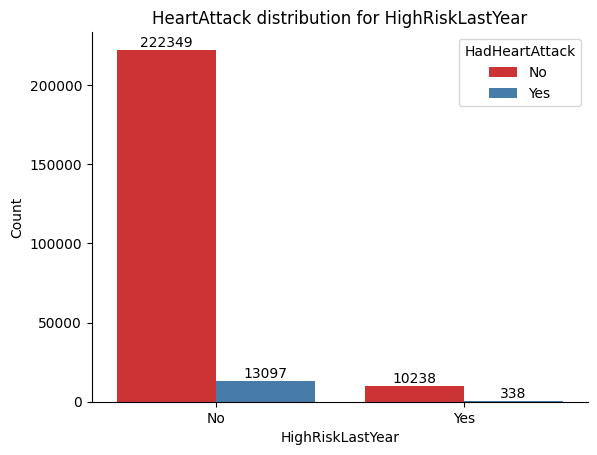

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='HighRiskLastYear',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for HighRiskLastYear')
plt.xlabel('HighRiskLastYear')
#plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

Most individuals who did not engage in high-risk behaviors over the past year did not experience a heart attack, but there is a notable portion who did. The group that engaged in high-risk behaviors has a significantly lower number of heart attacks overall, but the proportions are relatively higher compared to the no-risk group.

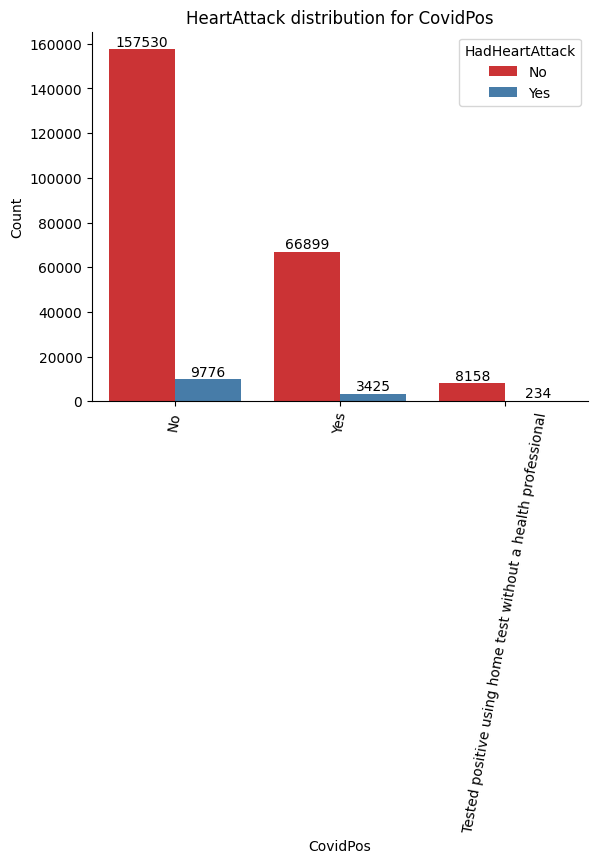

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.countplot(data=df,x='CovidPos',hue='HadHeartAttack', palette = 'Set1')
for containers in ax.containers:
  ax.bar_label(containers,label_type='edge',fontsize=10,color='black')
plt.title('HeartAttack distribution for CovidPos')
plt.xlabel('CovidPos')
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.legend(title='HadHeartAttack')
sns.despine(right=True)
plt.show()

Most individuals who tested negative for COVID-19 did not experience a heart attack, though a notable portion did. Among those who tested positive, the number of heart attacks is proportionally higher compared to the negative group. Additionally, individuals who tested positive using a home test without professional supervision show lower overall counts but a similar trend.

In [71]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'BMI_Category'],
      dtype='object')

In [72]:
df['DifficultyDressingBathing'].unique()

array(['No', 'Yes'], dtype=object)

### **Checking unique values in Sex column and Label encoding it.**

In [73]:
#finding unique values in the Sex column and label encoding them
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [74]:
# Creating a label encoding function for the dictionary
def encoding(df,column, dict):
  for idx, label in enumerate(df[column].unique()):
    dict[label] = idx
  df[column] = df[column].map(dict)
  return df

In [75]:
Sex={}
encoding(df,'Sex',Sex).head(2)
Sex

{'Female': 0, 'Male': 1}

### **Label Encoding GeneralHealth column**

In [76]:
df['GeneralHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [77]:
#Label Encoding the General Health values
GeneralHealth ={}
encoding(df,'GeneralHealth',GeneralHealth)
GeneralHealth

{'Very good': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3, 'Poor': 4}

In [78]:
df['PhysicalHealthDays'].unique()

array([ 4.,  0.,  5.,  3.,  2., 25., 30., 15., 29.,  8., 16., 20., 10.,
        9.,  7.,  1., 21.,  6., 27., 14., 12., 11., 13., 28., 17., 23.,
       24., 26., 18., 22., 19.])

In [79]:
df['MentalHealthDays'].unique()

array([ 0., 15.,  4., 25.,  5., 30., 27.,  3.,  2.,  1., 10., 20., 21.,
        6.,  7.,  8., 14.,  9., 12., 18., 29., 28., 17., 11., 16., 13.,
       26., 22., 24., 19., 23.])

### **Label Encoding the LastCheckupTime column**

In [80]:
df['LastCheckupTime'].unique()

array(['Within past year (anytime less than 12 months ago)',
       '5 or more years ago',
       'Within past 2 years (1 year but less than 2 years ago)',
       'Within past 5 years (2 years but less than 5 years ago)'],
      dtype=object)

In [81]:
LastCheckupTime={}
encoding(df,'LastCheckupTime',LastCheckupTime).head(2)
LastCheckupTime

{'Within past year (anytime less than 12 months ago)': 0,
 '5 or more years ago': 1,
 'Within past 2 years (1 year but less than 2 years ago)': 2,
 'Within past 5 years (2 years but less than 5 years ago)': 3}

### **Label Encoding the PhysicalActivities**

In [82]:
df['PhysicalActivities'].unique()

array(['Yes', 'No'], dtype=object)

In [83]:

PhysicalActivities ={}
encoding(df,'PhysicalActivities',PhysicalActivities)
PhysicalActivities

{'Yes': 0, 'No': 1}

In [84]:
df['SleepHours'].unique()

array([ 9.,  6.,  8.,  5.,  7., 10.,  4., 12.,  3., 18., 11.,  2.,  1.,
       16., 14., 15., 13., 20., 24., 23., 19., 17., 22.])

### **Label Encoding the RemovedTeeth**

In [85]:
df['RemovedTeeth'].unique()

array(['None of them', '6 or more, but not all', '1 to 5', 'All'],
      dtype=object)

In [86]:
RemovedTeeth ={}
encoding(df,'RemovedTeeth',RemovedTeeth)
RemovedTeeth

{'None of them': 0, '6 or more, but not all': 1, '1 to 5': 2, 'All': 3}

### **Label Encoding HadHeartAttack**

In [87]:
HadHeartAttack ={}
encoding(df,'HadHeartAttack',HadHeartAttack)
HadHeartAttack

{'No': 0, 'Yes': 1}

### **Label Encoding HadAngina**

In [88]:
df['HadAngina'].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
HadAngina={}
encoding(df,'HadAngina',HadAngina)
HadAngina

{'No': 0, 'Yes': 1}

### **Label Encoding HadStroke**

In [90]:
df['HadStroke'].unique()

array(['No', 'Yes'], dtype=object)

In [91]:
HadStroke={}
encoding(df,'HadStroke',HadStroke)
HadStroke

{'No': 0, 'Yes': 1}

### **Label Encoding HadAsthma**

In [92]:
df['HadAsthma'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
HadAsthma={}
encoding(df,'HadAsthma',HadAsthma)
HadAsthma

{'No': 0, 'Yes': 1}

### **Label Encoding HadSkinCancer**

In [94]:
df['HadSkinCancer'].unique()

array(['No', 'Yes'], dtype=object)

In [95]:
HadSkinCancer={}
encoding(df,'HadSkinCancer',HadSkinCancer)
HadSkinCancer

{'No': 0, 'Yes': 1}

### **Label Encoding HadCOPD**

In [96]:
df['HadCOPD'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
HadCOPD ={}
encoding(df,'HadCOPD',HadCOPD)
HadCOPD

{'No': 0, 'Yes': 1}

### **Label Encoding HadDepressiveDisorder**

In [98]:
df['HadDepressiveDisorder'].unique()

array(['No', 'Yes'], dtype=object)

In [99]:
HadDepressiveDisorder={}
encoding(df,'HadDepressiveDisorder',HadDepressiveDisorder)
HadDepressiveDisorder

{'No': 0, 'Yes': 1}

### **Label Encoding HadKidneyDisease**

In [100]:
df['HadKidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [101]:
HadKidneyDisease={}
encoding(df,'HadKidneyDisease',HadKidneyDisease)
HadKidneyDisease

{'No': 0, 'Yes': 1}

### **Label Encoding HadArthritis**

In [102]:
df['HadArthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [103]:
HadArthritis={}
encoding(df,'HadArthritis',HadArthritis)
HadArthritis

{'Yes': 0, 'No': 1}

### **Label Encoding  HadDiabetes**

In [104]:
df['HadDiabetes'].unique()

array(['No', 'Yes', 'Yes, but only during pregnancy (female)',
       'No, pre-diabetes or borderline diabetes'], dtype=object)

In [105]:
HadDiabetes={}
encoding(df,'HadDiabetes',HadDiabetes)
HadDiabetes

{'No': 0,
 'Yes': 1,
 'Yes, but only during pregnancy (female)': 2,
 'No, pre-diabetes or borderline diabetes': 3}

### **Label Encoding DeafOrHardOfHearing**

In [106]:
df['DeafOrHardOfHearing'].unique()

array(['No', 'Yes'], dtype=object)

In [107]:
DeafOrHardOfHearing={}
encoding(df,'DeafOrHardOfHearing',DeafOrHardOfHearing)
DeafOrHardOfHearing

{'No': 0, 'Yes': 1}

### **Label Encoding BlindOrVisionDifficulty**

In [108]:
df['BlindOrVisionDifficulty'].unique()

array(['No', 'Yes'], dtype=object)

In [109]:
BlindOrVisionDifficulty={}
encoding(df,'BlindOrVisionDifficulty',BlindOrVisionDifficulty)
BlindOrVisionDifficulty

{'No': 0, 'Yes': 1}

### **Label Encoding DifficultyConcentrating**

In [110]:
df['DifficultyConcentrating'].unique()

array(['No', 'Yes'], dtype=object)

In [111]:
DifficultyConcentrating={}
encoding(df,'DifficultyConcentrating',DifficultyConcentrating)
DifficultyConcentrating

{'No': 0, 'Yes': 1}

### **Label Encoding DifficultyWalking**

In [112]:

df['DifficultyWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [113]:
DifficultyWalking={}
encoding(df,'DifficultyWalking',DifficultyWalking)
DifficultyWalking

{'No': 0, 'Yes': 1}

### **Label Encoding  DifficultyDressingBathing**

In [114]:
df['DifficultyDressingBathing'].unique()

array(['No', 'Yes'], dtype=object)

In [115]:
DifficultyDressingBathing={}
encoding(df,'DifficultyDressingBathing',DifficultyDressingBathing)
DifficultyDressingBathing

{'No': 0, 'Yes': 1}

### **Label Encoding DifficultyErrands**

In [116]:
df['DifficultyErrands'].unique()

array(['No', 'Yes'], dtype=object)

In [117]:
DifficultyErrands={}
encoding(df,'DifficultyErrands',DifficultyErrands)
DifficultyErrands

{'No': 0, 'Yes': 1}

### **Label Encoding SmokerStatus**

In [118]:
df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [119]:
SmokerStatus={}
encoding(df,'SmokerStatus',SmokerStatus)
SmokerStatus

{'Former smoker': 0,
 'Never smoked': 1,
 'Current smoker - now smokes every day': 2,
 'Current smoker - now smokes some days': 3}

### **Label Encoding ECigaretteUsage**

In [120]:
df['ECigaretteUsage'].unique()

array(['Never used e-cigarettes in my entire life', 'Use them some days',
       'Not at all (right now)', 'Use them every day'], dtype=object)

In [121]:
ECigaretteUsage={}
encoding(df,'ECigaretteUsage',ECigaretteUsage)
ECigaretteUsage

{'Never used e-cigarettes in my entire life': 0,
 'Use them some days': 1,
 'Not at all (right now)': 2,
 'Use them every day': 3}

### **Label Encoding ChestScan**

In [122]:
df['ChestScan'].unique()

array(['No', 'Yes'], dtype=object)

In [123]:
ChestScan={}
encoding(df,'ChestScan',ChestScan)
ChestScan

{'No': 0, 'Yes': 1}

### **Label Encoding RaceEthnicityCategory**

In [124]:
df['RaceEthnicityCategory'].unique()

array(['White only, Non-Hispanic', 'Black only, Non-Hispanic',
       'Other race only, Non-Hispanic', 'Multiracial, Non-Hispanic',
       'Hispanic'], dtype=object)

In [125]:
RaceEthnicityCategory={}
encoding(df,'RaceEthnicityCategory',RaceEthnicityCategory)
RaceEthnicityCategory

{'White only, Non-Hispanic': 0,
 'Black only, Non-Hispanic': 1,
 'Other race only, Non-Hispanic': 2,
 'Multiracial, Non-Hispanic': 3,
 'Hispanic': 4}

### **Label Encoding AgeCategory**

In [126]:
df['AgeCategory'].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older',
       'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

In [127]:
AgeCategory={}
encoding(df,'AgeCategory',AgeCategory)
AgeCategory

{'Age 65 to 69': 0,
 'Age 70 to 74': 1,
 'Age 75 to 79': 2,
 'Age 80 or older': 3,
 'Age 50 to 54': 4,
 'Age 40 to 44': 5,
 'Age 60 to 64': 6,
 'Age 55 to 59': 7,
 'Age 45 to 49': 8,
 'Age 35 to 39': 9,
 'Age 25 to 29': 10,
 'Age 30 to 34': 11,
 'Age 18 to 24': 12}

### **Label Encoding AlcoholDrinkers**

In [128]:
df['AlcoholDrinkers'].unique()

array(['No', 'Yes'], dtype=object)

In [129]:
AlcoholDrinkers={}
encoding(df,'AlcoholDrinkers',AlcoholDrinkers)
AlcoholDrinkers

{'No': 0, 'Yes': 1}

### **Label Encoding HIVTesting**

In [130]:
df['HIVTesting'].unique()

array(['No', 'Yes'], dtype=object)

In [131]:
HIVTesting={}
encoding(df,'HIVTesting',HIVTesting)
HIVTesting

{'No': 0, 'Yes': 1}

### **Label Encoding FluVaxLast12**

In [132]:
df['FluVaxLast12'].unique()

array(['Yes', 'No'], dtype=object)

In [133]:
FluVaxLast12={}
encoding(df,'FluVaxLast12',FluVaxLast12)
FluVaxLast12

{'Yes': 0, 'No': 1}

### **Label Encoding  PneumoVaxEver**

In [134]:
df['PneumoVaxEver'].unique()

array(['Yes', 'No'], dtype=object)

In [135]:
PneumoVaxEver={}
encoding(df,'PneumoVaxEver',PneumoVaxEver)
PneumoVaxEver

{'Yes': 0, 'No': 1}

### **Label Encoding TetanusLast10Tdap**

In [136]:
df['TetanusLast10Tdap'].unique()

array(['Yes, received Tdap',
       'Yes, received tetanus shot but not sure what type',
       'No, did not receive any tetanus shot in the past 10 years',
       'Yes, received tetanus shot, but not Tdap'], dtype=object)

In [137]:
TetanusLast10Tdap={}
encoding(df,'TetanusLast10Tdap',TetanusLast10Tdap)
TetanusLast10Tdap

{'Yes, received Tdap': 0,
 'Yes, received tetanus shot but not sure what type': 1,
 'No, did not receive any tetanus shot in the past 10 years': 2,
 'Yes, received tetanus shot, but not Tdap': 3}

### **Label Encoding HighRiskLastYear**

In [138]:
df['HighRiskLastYear'].unique()

array(['No', 'Yes'], dtype=object)

In [139]:
HighRiskLastYear={}
encoding(df,'HighRiskLastYear',HighRiskLastYear)
HighRiskLastYear

{'No': 0, 'Yes': 1}

### **Label Encoding CovidPos**

In [140]:
df['CovidPos'].unique()

array(['No', 'Yes',
       'Tested positive using home test without a health professional'],
      dtype=object)

In [141]:
CovidPos={}
encoding(df,'CovidPos',CovidPos)
CovidPos

{'No': 0,
 'Yes': 1,
 'Tested positive using home test without a health professional': 2}

In [142]:
df.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama    0              0                 4.0               0.0   
1  Alabama    1              0                 0.0               0.0   
2  Alabama    1              0                 0.0               0.0   
3  Alabama    0              1                 5.0               0.0   
4  Alabama    0              2                 3.0              15.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                0                   0         9.0             0   
1                0                   0         6.0             0   
2                0                   1         8.0             1   
3                0                   0         9.0             0   
4                0                   0         5.0             2   

   HadHeartAttack  ...  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
0               0  ...              71.67  27.99                0           0   
1               0  ...              95.25  30.13                0           0   
2               0  ...             108.86  31.66                1           0   
3               0  ...              90.72  31.32                0           0   
4               0  ...              79.38  33.07                0           0   

   FluVaxLast12  PneumoVaxEver  TetanusLast10Tdap  HighRiskLastYear  CovidPos  \
0             0              0                  0                 0         0   
1             0              0                  1                 0         0   
2             1              0                  2                 0         1   
3             0              0                  2                 0         1   
4             0              0                  2                 0         0   

      BMI_Category  
0       Overweight  
1  Obesity class I  
2  Obesity class I  
3  Obesity class I  
4  Obesity class I  

[5 rows x 41 columns]

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  int64  
 2   GeneralHealth              246022 non-null  int64  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int64  
 6   PhysicalActivities         246022 non-null  int64  
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  int64  
 9   HadHeartAttack             246022 non-null  int64  
 10  HadAngina                  246022 non-null  int64  
 11  HadStroke                  246022 non-null  int64  
 12  HadAsthma                  246022 non-null  int64  
 13  HadSkinCancer              24

In [144]:
from scipy.stats import chi2_contingency

categorical_columns = ['Sex', 'GeneralHealth','LastCheckupTime','PhysicalActivities',
                       'RemovedTeeth','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
                       'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes',
                       'DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking',
                       'DifficultyDressingBathing','DifficultyErrands','SmokerStatus','ECigaretteUsage','ChestScan',
                       'RaceEthnicityCategory','AgeCategory','AlcoholDrinkers','HIVTesting','FluVaxLast12',
                       'PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos']

In [145]:
chi_square_results = {}
from scipy.stats import chi2_contingency

for cols in categorical_columns:
  contingency_table = pd.crosstab(df[cols], df['HadHeartAttack'])

  #Performing Chi-Square test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  chi_square_results[cols] = p_value

In [146]:
chi_square_results

{'Sex': 2.086026071340358e-289,
 'GeneralHealth': 0.0,
 'LastCheckupTime': 1.1420838066710813e-268,
 'PhysicalActivities': 0.0,
 'RemovedTeeth': 0.0,
 'HadAngina': 0.0,
 'HadStroke': 0.0,
 'HadAsthma': 5.526035547516796e-32,
 'HadSkinCancer': 1.850453342490879e-132,
 'HadCOPD': 0.0,
 'HadDepressiveDisorder': 7.295212028761504e-32,
 'HadKidneyDisease': 0.0,
 'HadArthritis': 0.0,
 'HadDiabetes': 0.0,
 'DeafOrHardOfHearing': 0.0,
 'BlindOrVisionDifficulty': 1.799477104556634e-286,
 'DifficultyConcentrating': 1.151407973094875e-144,
 'DifficultyWalking': 0.0,
 'DifficultyDressingBathing': 0.0,
 'DifficultyErrands': 0.0,
 'SmokerStatus': 0.0,
 'ECigaretteUsage': 1.3352362106950711e-24,
 'ChestScan': 0.0,
 'RaceEthnicityCategory': 2.8354859723996284e-41,
 'AgeCategory': 0.0,
 'AlcoholDrinkers': 3.175611575035547e-296,
 'HIVTesting': 5.442223201362464e-13,
 'FluVaxLast12': 2.0927963350941613e-111,
 'PneumoVaxEver': 0.0,
 'TetanusLast10Tdap': 4.7573727372082324e-89,
 'HighRiskLastYear': 1.3561

In [147]:
list = chi_square_results.items()

In [148]:
list

dict_items([('Sex', 2.086026071340358e-289), ('GeneralHealth', 0.0), ('LastCheckupTime', 1.1420838066710813e-268), ('PhysicalActivities', 0.0), ('RemovedTeeth', 0.0), ('HadAngina', 0.0), ('HadStroke', 0.0), ('HadAsthma', 5.526035547516796e-32), ('HadSkinCancer', 1.850453342490879e-132), ('HadCOPD', 0.0), ('HadDepressiveDisorder', 7.295212028761504e-32), ('HadKidneyDisease', 0.0), ('HadArthritis', 0.0), ('HadDiabetes', 0.0), ('DeafOrHardOfHearing', 0.0), ('BlindOrVisionDifficulty', 1.799477104556634e-286), ('DifficultyConcentrating', 1.151407973094875e-144), ('DifficultyWalking', 0.0), ('DifficultyDressingBathing', 0.0), ('DifficultyErrands', 0.0), ('SmokerStatus', 0.0), ('ECigaretteUsage', 1.3352362106950711e-24), ('ChestScan', 0.0), ('RaceEthnicityCategory', 2.8354859723996284e-41), ('AgeCategory', 0.0), ('AlcoholDrinkers', 3.175611575035547e-296), ('HIVTesting', 5.442223201362464e-13), ('FluVaxLast12', 2.0927963350941613e-111), ('PneumoVaxEver', 0.0), ('TetanusLast10Tdap', 4.75737273

In [149]:
# converting the dictionary into list and then into a Pandas Dataframe.
df_chi = pd.DataFrame(list, columns=['Column','p_value'])
df_chi = df_chi.sort_values(by='p_value', ascending=False)
df_chi

Column        p_value
26                 HIVTesting   5.442223e-13
21            ECigaretteUsage   1.335236e-24
30           HighRiskLastYear   1.356153e-25
10      HadDepressiveDisorder   7.295212e-32
7                   HadAsthma   5.526036e-32
23      RaceEthnicityCategory   2.835486e-41
31                   CovidPos   1.541843e-46
29          TetanusLast10Tdap   4.757373e-89
27               FluVaxLast12  2.092796e-111
8               HadSkinCancer  1.850453e-132
16    DifficultyConcentrating  1.151408e-144
2             LastCheckupTime  1.142084e-268
15    BlindOrVisionDifficulty  1.799477e-286
0                         Sex  2.086026e-289
25            AlcoholDrinkers  3.175612e-296
22                  ChestScan   0.000000e+00
3          PhysicalActivities   0.000000e+00
28              PneumoVaxEver   0.000000e+00
4                RemovedTeeth   0.000000e+00
5                   HadAngina   0.000000e+00
24                AgeCategory   0.000000e+00
6                   HadStroke   0.000000e+00
11           HadKidneyDisease   0.000000e+00
12               HadArthritis   0.000000e+00
20               SmokerStatus   0.000000e+00
19          DifficultyErrands   0.000000e+00
18  DifficultyDressingBathing   0.000000e+00
17          DifficultyWalking   0.000000e+00
1               GeneralHealth   0.000000e+00
14        DeafOrHardOfHearing   0.000000e+00
13                HadDiabetes   0.000000e+00
9                     HadCOPD   0.000000e+00

### For the columns to be statistically significant to the target variable column **HadHeartAttack**, the p_value for the the chi-sqaure test performed should be less that 0.05. This means that we reject the null hypothesis that the columns are not statistically significant. From the above table it can be clearly seen that all the columns are statistically significant for the HadHeartAttack target variable and hence we would consider all the categorical columns.

## **Now considering Statistical test for the Numerical Columns**


### Checking the data distribution for the columns using Histogram.

In [150]:
numerical_columns = ['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms','BMI']

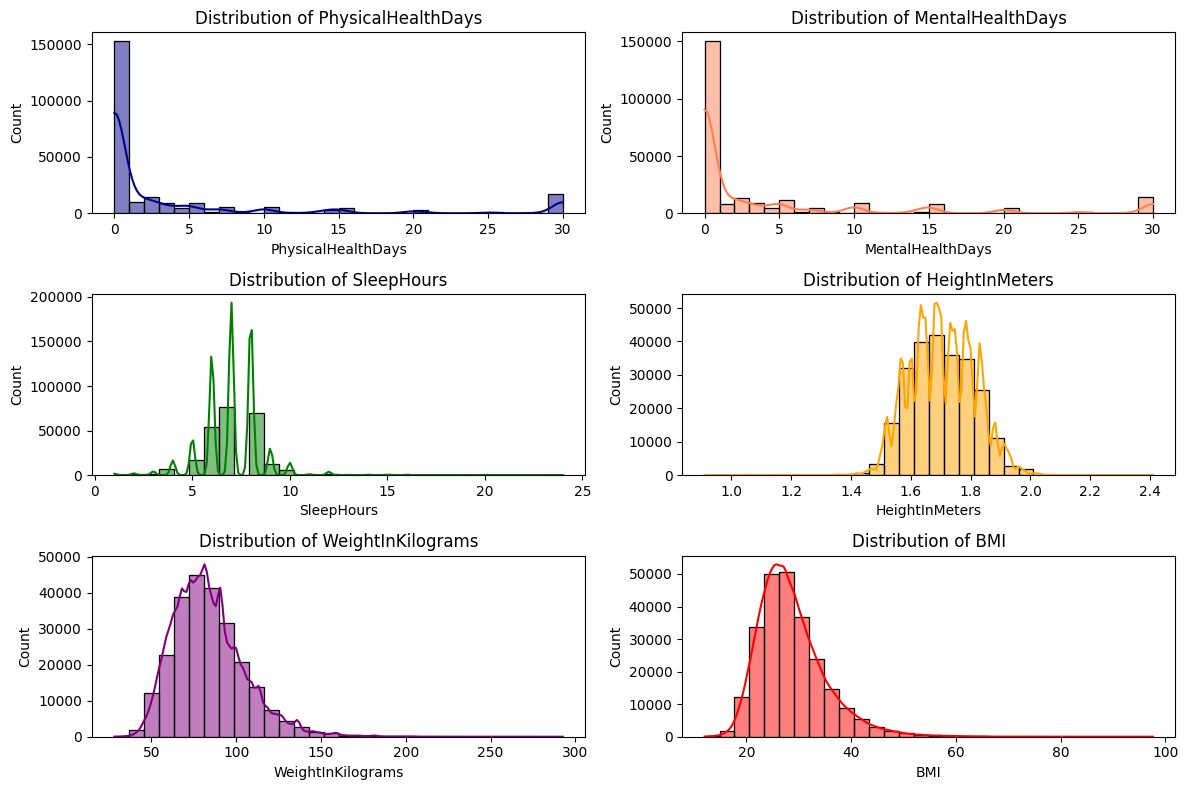

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3,2,figsize=(12,8))
sns.histplot(df['PhysicalHealthDays'], bins=30, kde=True,color='darkblue', ax=axes[0,0])
axes[0,0].set_title('Distribution of PhysicalHealthDays')

# Plot MentalHealthDays
sns.histplot(df['MentalHealthDays'],bins=30,kde=True,color='coral',ax=axes[0,1])
axes[0,1].set_title('Distribution of MentalHealthDays')

#Plotting SleepHours
sns.histplot(df['SleepHours'],bins=30,kde=True,color='green',ax=axes[1,0])
axes[1,0].set_title('Distribution of SleepHours')

#Plotting HeightInMeters
sns.histplot(df['HeightInMeters'],bins=30,kde=True,color='orange',ax=axes[1,1])
axes[1,1].set_title('Distribution of HeightInMeters')

#Plotting WeightInKilograms
sns.histplot(df['WeightInKilograms'],bins=30,kde=True,color='purple',ax=axes[2,0])
axes[2,0].set_title('Distribution of WeightInKilograms')

#Plotting BMI
sns.histplot(df['BMI'],bins=30,kde=True,color='red',ax=axes[2,1])
axes[2,1].set_title('Distribution of BMI')

#Plotting

plt.tight_layout()
plt.show()


1. From the histogram plots above it can be clearly seen that Distribution of PhysicalHealthDays, MentalHealthDays, SleepHours, WeightInKilgrams and BMI are backward skewed.
2. The distribution of HeighInMeters is closest to normal distribution.


### Also checking Normality distribution using **Shapiro Wilk Test and QQ Plots**

In [152]:
from scipy.stats import shapiro
normality_test = {}
for cols in numerical_columns:
  stat,p_value = shapiro(df[cols])
  normality_test[cols] = p_value

In [153]:
#Converting the dict into list for Pandas Dataframe

list_normality = normality_test.items()
df_normality = pd.DataFrame(list_normality,columns=['Column','p_value'])
df_normality

Column        p_value
0  PhysicalHealthDays  1.729384e-180
1    MentalHealthDays  4.664132e-178
2          SleepHours  1.358189e-132
3      HeightInMeters   2.133010e-76
4   WeightInKilograms  2.455060e-110
5                 BMI  2.360572e-121

### From the QQ Plot above as well as the Shapiro Wilk Test it can be observed that the data is not normally distributed. Since the data distribution is not normal we will not be able to perform ML Algorithms like Linear Regression or Logistic Regression as these algorithms need to be have prerequisites such as LINE assumption - L (Linearity), I - (Independence of Data groups), N- (Normality of Data Distribution) , E - (.Equal Variance)

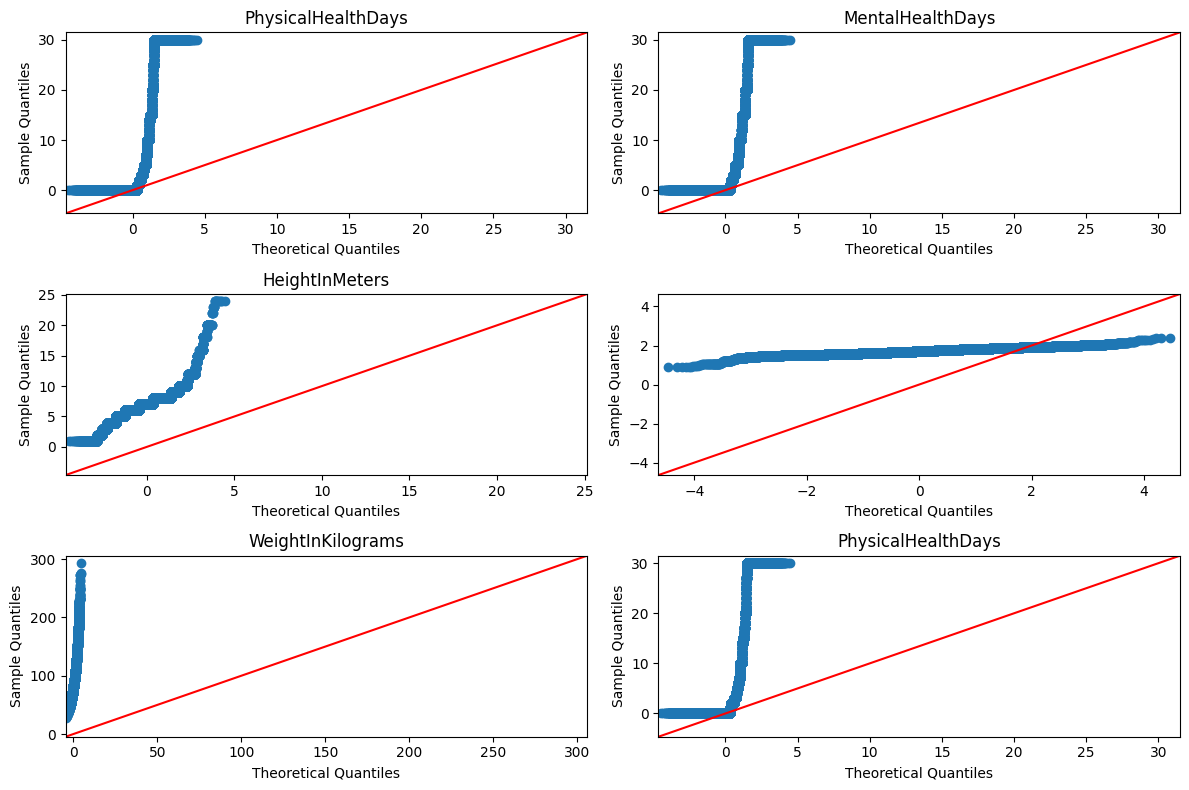

In [154]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig,axes = plt.subplots(3,2,figsize=(12,8))

#QQ plot for PhysicalHealthDays
sm.qqplot(df['PhysicalHealthDays'],line='45',ax=axes[0,0])
axes[0,0].set_title('PhysicalHealthDays')

#QQ Plot for MentalHealthDays
sm.qqplot(df['MentalHealthDays'],line='45',ax=axes[0,1])
axes[0,1].set_title('MentalHealthDays')

#QQ Plot for SleepHours
sm.qqplot(df['SleepHours'],line='45',ax=axes[1,0])
axes[1,0].set_title('SleepHours')

#QQ Plot for HeightInMeters
sm.qqplot(df['HeightInMeters'],line='45',ax=axes[1,1])
axes[1,0].set_title('HeightInMeters')

#QQ Plot for WeightInKilograms
sm.qqplot(df['WeightInKilograms'],line='45',ax=axes[2,0])
axes[2,0].set_title('WeightInKilograms')

# Assuming 'PhysicalHealthDays' is the numerical column you want to test
sm.qqplot(df['PhysicalHealthDays'], line='45', ax = axes[2,1])
axes[2,1].set_title('PhysicalHealthDays')

# Display the plot
plt.tight_layout()

plt.show()


### We would now perform Non-Parametric Statistical Test like **Mann-Whitney U**  test to check the independence of Data.

In [155]:
from scipy.stats import mannwhitneyu

mann_whitney_u = {}
for cols in numerical_columns:
  group1 = df[df['HadHeartAttack'] == 0][cols]
  group2 = df[df['HadHeartAttack'] == 1][cols]
  stat, p_value = mannwhitneyu(group1, group2)
  mann_whitney_u[cols] = p_value

In [156]:
mann_whitney = mann_whitney_u.items()
df_mann_whitney = pd.DataFrame(mann_whitney,columns=['Columns','p_value'])

In [157]:
df_mann_whitney

Columns        p_value
0  PhysicalHealthDays   0.000000e+00
1    MentalHealthDays   1.433664e-01
2          SleepHours   4.512715e-01
3      HeightInMeters   2.564615e-43
4   WeightInKilograms  1.175541e-101
5                 BMI   1.969763e-74

### The Mann-Whitney-U null hypothesis states that if the p_value is greater than 0.05 than the groups are not independent. From the dataframe above it can be observed that the numerical columns are independent of each other and all the features would be selected for applying Machine Learning Algorithm.

In [158]:
numerical_columns = ['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms','BMI']

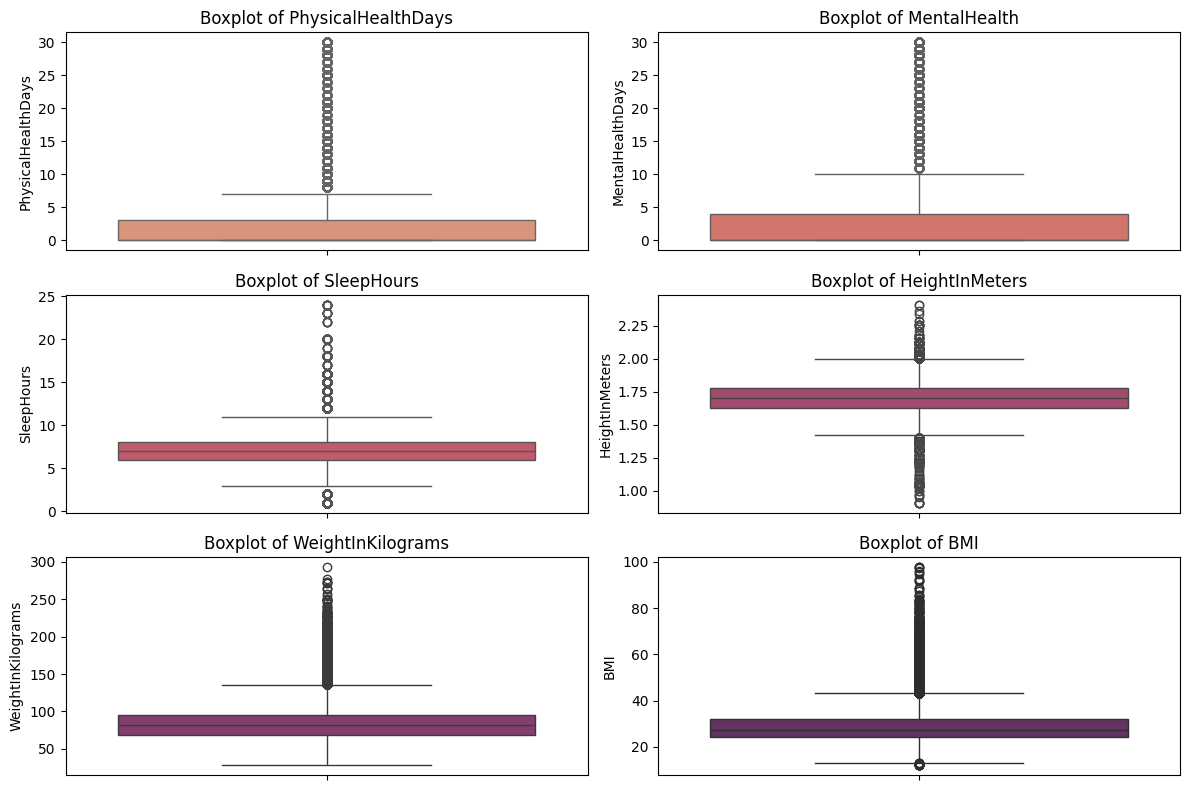

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("flare")

fig, axes = plt.subplots(3,2,figsize=(12,8))

#Plot PhysicalHealthDays
sns.boxplot(df['PhysicalHealthDays'],color= color[0],ax=axes[0,0])
axes[0,0].set_title('Boxplot of PhysicalHealthDays')

#Plot MentalHealthDays
sns.boxplot(df['MentalHealthDays'],color=color[1],ax=axes[0,1])
axes[0,1].set_title('Boxplot of MentalHealth')

#Plot SleepHours
sns.boxplot(df['SleepHours'],color=color[2],ax=axes[1,0])
axes[1,0].set_title('Boxplot of SleepHours')

#Plot HeightInMeters
sns.boxplot(df['HeightInMeters'],color=color[3],ax=axes[1,1])
axes[1,1].set_title('Boxplot of HeightInMeters')

#Plot WeightInKilograms
sns.boxplot(df['WeightInKilograms'],color=color[4],ax=axes[2,0])
axes[2,0].set_title('Boxplot of WeightInKilograms')

#Plot BMI
sns.boxplot(df['BMI'],color=color[5],ax=axes[2,1])
axes[2,1].set_title('Boxplot of BMI')

#Plotting
plt.tight_layout()
plt.show()

#### Removing Outliers

In [160]:
for columns in numerical_columns:
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3 +1.5*IQR
  df_final = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]
  #print('Data shape', df_final.shape)


In [161]:
df_final.shape

(238459, 41)

In [162]:
df.shape

(246022, 41)

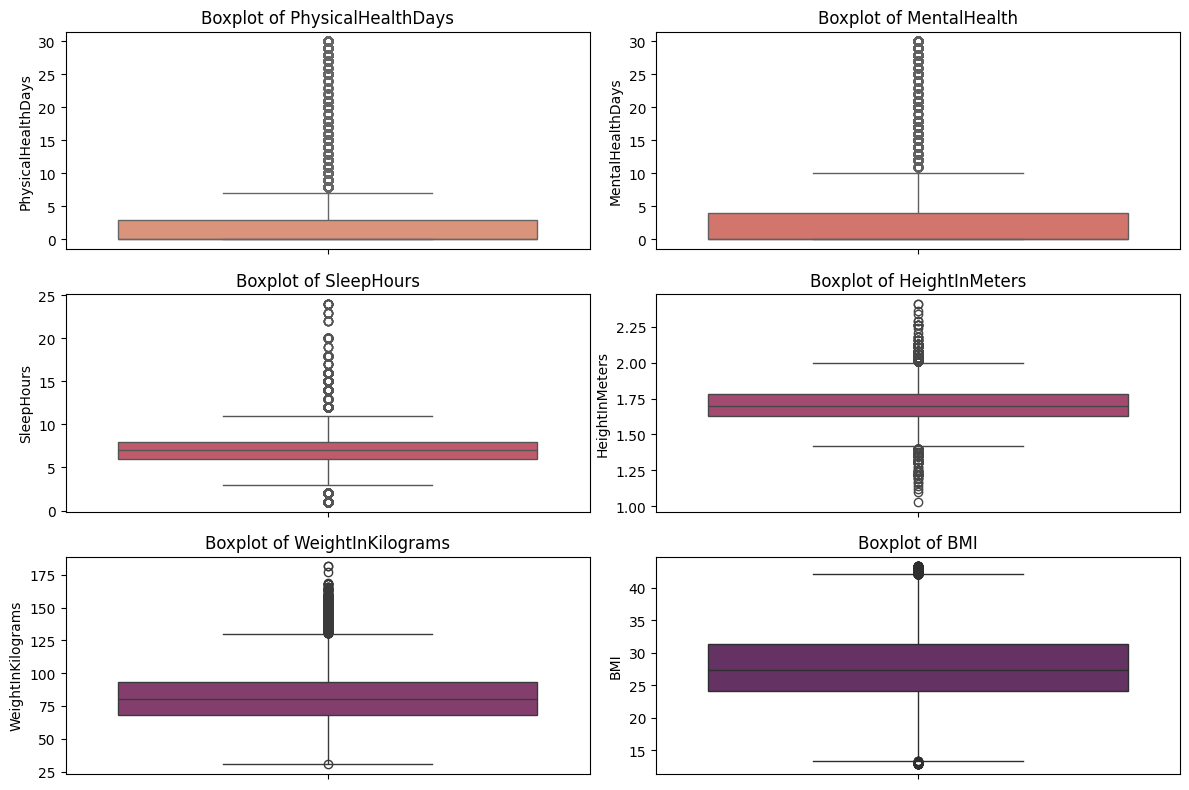

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette("flare")

fig, axes = plt.subplots(3,2,figsize=(12,8))

#Plot PhysicalHealthDays
sns.boxplot(df_final['PhysicalHealthDays'],color= color[0],ax=axes[0,0])
axes[0,0].set_title('Boxplot of PhysicalHealthDays')

#Plot MentalHealthDays
sns.boxplot(df_final['MentalHealthDays'],color=color[1],ax=axes[0,1])
axes[0,1].set_title('Boxplot of MentalHealth')

#Plot SleepHours
sns.boxplot(df_final['SleepHours'],color=color[2],ax=axes[1,0])
axes[1,0].set_title('Boxplot of SleepHours')

#Plot HeightInMeters
sns.boxplot(df_final['HeightInMeters'],color=color[3],ax=axes[1,1])
axes[1,1].set_title('Boxplot of HeightInMeters')

#Plot WeightInKilograms
sns.boxplot(df_final['WeightInKilograms'],color=color[4],ax=axes[2,0])
axes[2,0].set_title('Boxplot of WeightInKilograms')

#Plot BMI
sns.boxplot(df_final['BMI'],color=color[5],ax=axes[2,1])
axes[2,1].set_title('Boxplot of BMI')

#Plotting
plt.tight_layout()
plt.show()

In [164]:
numerical_columns = ['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','WeightInKilograms','BMI']
categorical_columns = ['Sex', 'GeneralHealth','LastCheckupTime','PhysicalActivities',
                       'RemovedTeeth','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
                       'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes',
                       'DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking',
                       'DifficultyDressingBathing','DifficultyErrands','SmokerStatus','ECigaretteUsage','ChestScan',
                       'RaceEthnicityCategory','AgeCategory','AlcoholDrinkers','HIVTesting','FluVaxLast12',
                       'PneumoVaxEver','TetanusLast10Tdap','HighRiskLastYear','CovidPos']

In [165]:
columns = numerical_columns + categorical_columns + ['HadHeartAttack']

In [166]:
df_all = df[columns]

In [167]:
df_all.head()

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                 4.0               0.0         9.0            1.60   
1                 0.0               0.0         6.0            1.78   
2                 0.0               0.0         8.0            1.85   
3                 5.0               0.0         9.0            1.70   
4                 3.0              15.0         5.0            1.55   

   WeightInKilograms    BMI  Sex  GeneralHealth  LastCheckupTime  \
0              71.67  27.99    0              0                0   
1              95.25  30.13    1              0                0   
2             108.86  31.66    1              0                0   
3              90.72  31.32    0              1                0   
4              79.38  33.07    0              2                0   

   PhysicalActivities  ...  RaceEthnicityCategory  AgeCategory  \
0                   0  ...                      0            0   
1                   0  ...                      0            1   
2                   1  ...                      0            2   
3                   0  ...                      0            3   
4                   0  ...                      0            3   

   AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                0           0             0              0   
1                0           0             0              0   
2                1           0             1              0   
3                0           0             0              0   
4                0           0             0              0   

   TetanusLast10Tdap  HighRiskLastYear  CovidPos  HadHeartAttack  
0                  0                 0         0               0  
1                  1                 0         0               0  
2                  2                 0         1               0  
3                  2                 0         1               0  
4                  2                 0         0               0  

[5 rows x 39 columns]

### We will find the independence of the input features through Correlation matrix.

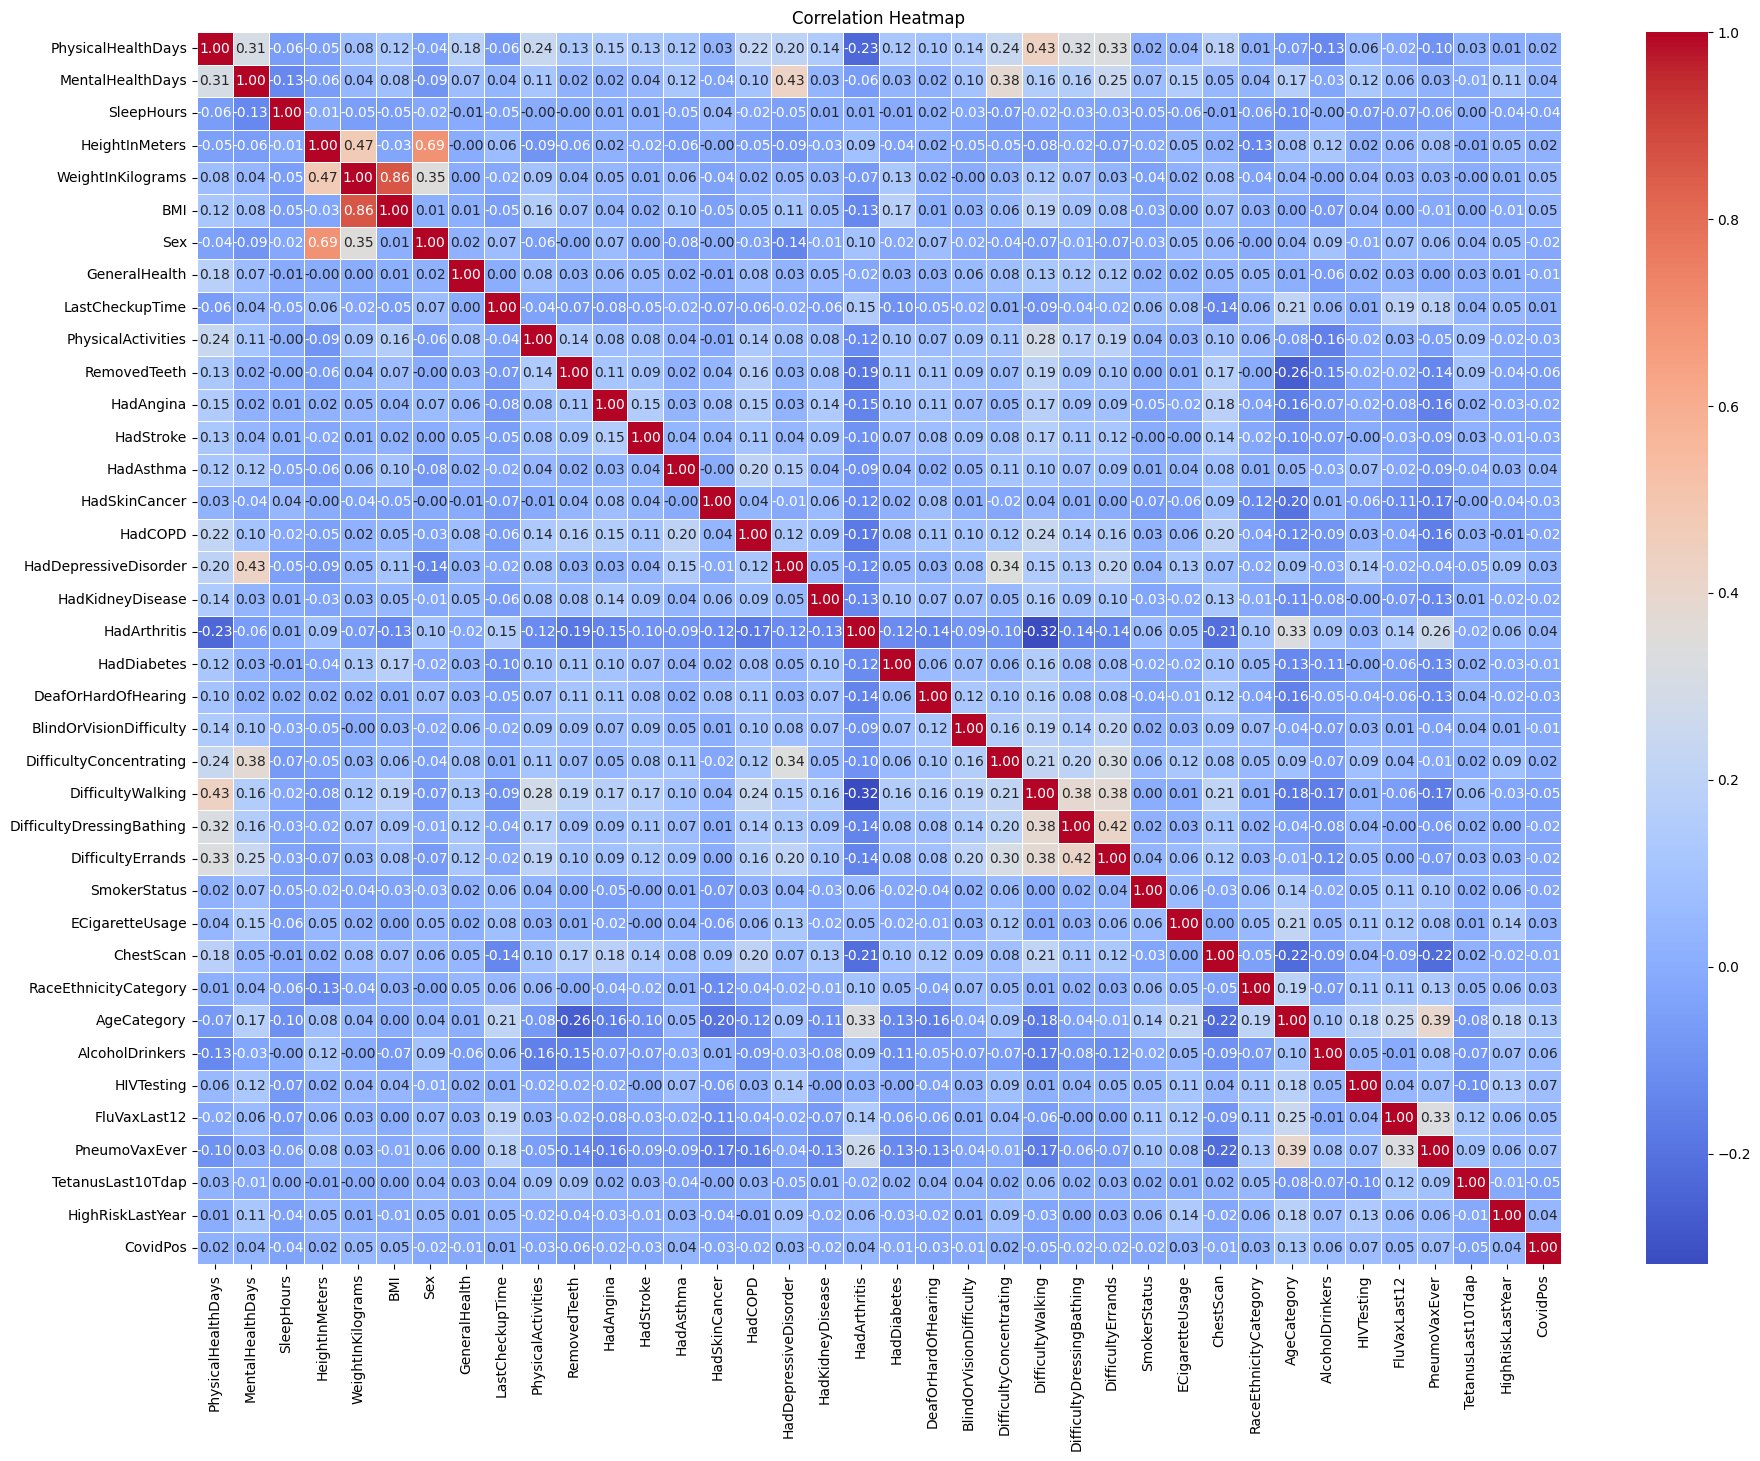

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df_all.drop('HadHeartAttack',axis=1)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(22, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 The above plot is the correlation matrix to test the indepence of input features.

* It can be oberved that BMI, HeightInMeters and WeightInKilograms are highly correlated and only one should be chosen so as to avoid multicolinearity.

* When comparing the  correlation with target variable it was observed that HadAngina had the strongest correlation with HadHeartAttack followed by HadStroke.


In [169]:
df_final = df_all.drop(['HeightInMeters','WeightInKilograms'], axis=1)
df_final.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'Sex',
       'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
       'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

In [170]:
numerical_columns_updated = ['PhysicalHealthDays','MentalHealthDays','SleepHours','BMI']

In [171]:
df = df_final

## **Machine Learning Algorithm**

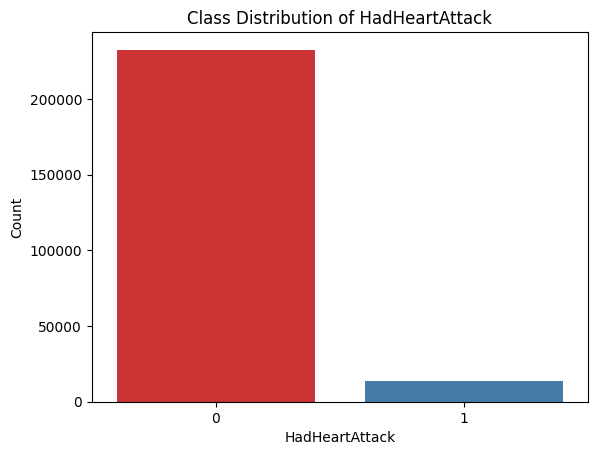

In [172]:
import seaborn as sns

sns.countplot(x='HadHeartAttack', data=df, palette='Set1')
plt.xlabel('HadHeartAttack')
plt.ylabel('Count')
plt.title('Class Distribution of HadHeartAttack')
plt.show()


# **Logistic Regression**

Since our data is non-normally distributed we will use MinMaxScaler instead of StandardScaler since that data still has outliers and it is heavily skewed.

In [173]:
# Splitting X and y for ML algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
X = df_final.drop('HadHeartAttack',axis=1)
y = df_final['HadHeartAttack']
scaler = MinMaxScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[numerical_columns_updated] = scaler.fit_transform(X_train[numerical_columns_updated])
X_test[numerical_columns_updated] = scaler.transform(X_test[numerical_columns_updated])

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.9486434305456762
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.55      0.24      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



## **Logistic Regression with Cross Validation**

In [174]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

X_cv = df_final.drop('HadHeartAttack',axis=1)
y_cv = df_final['HadHeartAttack']

scaler=MinMaxScaler()

X_train_cv,X_test_cv,y_train_cv,y_test_cv = train_test_split(X_cv,y_cv,random_state=42,test_size=0.2)

X_train_cv[numerical_columns_updated]=scaler.fit_transform(X_train_cv[numerical_columns_updated])
X_test_cv[numerical_columns_updated] = scaler.transform(X_test_cv[numerical_columns_updated])


model = LogisticRegression()

cv_score = cross_val_score(model,X_train_cv,y_train_cv,cv=5,scoring='accuracy')
print('Cross Validation Score ',cv_score)
print('Mean Cross Validation Score ',cv_score.mean())

model.fit(X_train_cv,y_train_cv)
y_pred= model.predict(X_test_cv)

accuracy = accuracy_score(y_test_cv,y_pred)
print('Accuracy: ',accuracy)
print("Classification Report:\n", classification_report(y_test_cv, y_pred))



Cross Validation Score  [0.94792196 0.94827761 0.94642177 0.94644717 0.947692  ]
Mean Cross Validation Score  0.9473521012139663
Accuracy:  0.9486434305456762
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.55      0.24      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



* There is no difference in the results in applying Logistic Regression and Logistic Regression with cross validation.

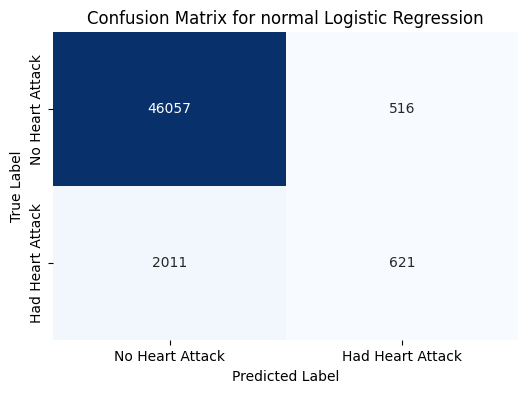

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels and y_pred is the predicted labels
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for normal Logistic Regression')
plt.show()


## **Logistic Regression with class_weight = balance**

In [176]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

X_w = df_final.drop('HadHeartAttack',axis=1)
y = df_final['HadHeartAttack']

scaler=MinMaxScaler()

X_train_cv,X_test_cv,y_train,y_test = train_test_split(X_w,y,random_state=42,test_size=0.2)

X_train_cv[numerical_columns_updated]=scaler.fit_transform(X_train_cv[numerical_columns_updated])
X_test_cv[numerical_columns_updated] = scaler.transform(X_test_cv[numerical_columns_updated])
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.8362361548623107
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91     46573
           1       0.21      0.74      0.32      2632

    accuracy                           0.84     49205
   macro avg       0.60      0.79      0.62     49205
weighted avg       0.94      0.84      0.88     49205



## **Applying Cross-Validation to the above model**

In [177]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

X_w_cv = df_final.drop('HadHeartAttack',axis=1)
y = df_final['HadHeartAttack']

scaler=MinMaxScaler()

X_train_cv,X_test_cv,y_train,y_test = train_test_split(X_w_cv,y,random_state=42,test_size=0.2)

X_train_cv[numerical_columns_updated]=scaler.fit_transform(X_train_cv[numerical_columns_updated])
X_test_cv[numerical_columns_updated] = scaler.transform(X_test_cv[numerical_columns_updated])

model = LogisticRegression(class_weight='balanced', random_state=42)

cv_scores = cross_val_score(model,X_train_cv,y_train,cv=5, scoring='accuracy')
print('Cross Validation Score ',cv_scores)
print('Mean Cross Validation Score ',cv_scores.mean())

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Cross Validation Score  [0.83472208 0.83492531 0.83664863 0.83860478 0.83865559]
Mean Cross Validation Score  0.8367112788791831
Accuracy:  0.8362361548623107
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91     46573
           1       0.21      0.74      0.32      2632

    accuracy                           0.84     49205
   macro avg       0.60      0.79      0.62     49205
weighted avg       0.94      0.84      0.88     49205



* There is no change in the classification Report after applying Cross Validation.

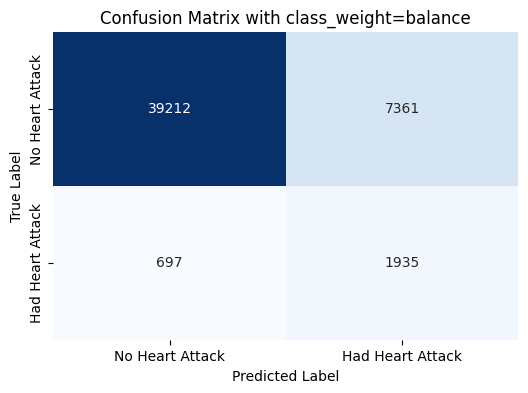

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test is the true labels and y_pred is the predicted labels
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with class_weight=balance')
plt.show()


* Model 1 (without class weighting) shows higher accuracy and performs very well on Class 0 (no heart attack), but it performs poorly on Class 1 (heart attack), with a low recall of 0.24. This means it is missing many cases of heart attacks.

* Model 2 (with class_weight='balanced') has a lower accuracy, but it performs much better on Class 1, with a recall of 0.74. This means it is identifying more heart attack cases. Even though its precision for Class 1 is lower (0.21), the improved recall makes it more suitable for situations where identifying heart attack cases (true positives) is crucial.

## Confusion Matrix
* It can be observed that Logistic Regression without class balance has high precision for NoHeartattacks but fails to correctly identify people with HeartAttacks.
* For Logistic Regression model with class_weight - balanced compromises on precision to predict NoHeartAttacks but has a higher precision in predicting HeartAttacks.

* In medical profession where it more important to not miss out on positive cases such as heart attacks then we should go in the model with class_weight - balance which has an accuracy of 83%.

### Applying SMOTE technique to imporve class imbalance and check the results.

In [179]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_smote = df_final.drop('HadHeartAttack', axis=1)
y_smote = df_final['HadHeartAttack']

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train_smote,y_train_smote)

scaler = MinMaxScaler()

X_train_smote[numerical_columns_updated] = scaler.fit_transform(X_train_smote[numerical_columns_updated])
X_test_smote[numerical_columns_updated] = scaler.transform(X_test_smote[numerical_columns_updated])
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test_smote)

accuracy = accuracy_score(y_test_smote,y_pred)
print('Accuracy: ',accuracy)
print("Classification Report:\n", classification_report(y_test_smote, y_pred))


Accuracy:  0.81101514073773
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     46573
           1       0.15      0.54      0.23      2632

    accuracy                           0.81     49205
   macro avg       0.56      0.68      0.56     49205
weighted avg       0.93      0.81      0.86     49205



## Applying cross-validation along with SMOTE.

In [180]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline


smote = SMOTE(random_state=42)

X_train_smote_cv, X_test_smote_cv,y_train,y_test = train_test_split(X_smote,y_smote,random_state=42,test_size=0.2)

pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression())
])

cv_scores = cross_val_score(pipeline,X_train_smote_cv,y_train,cv=5, scoring='accuracy')
# Print cross-validation accuracy scores and mean
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))

pipeline.fit(X_train_smote_cv,y_train)
y_pred = pipeline.predict(X_test_smote_cv)

#Evaluate the model on the test set
accuracy = accuracy_score(y_test_smote, y_pred)
print('Test set accuracy: ', accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test_smote, y_pred))

Cross-validation accuracy scores: [0.81391627 0.81536429 0.81617255 0.813124   0.81363209]
Mean cross-validation accuracy: 0.8144418398975641
Test set accuracy:  0.8113809572197948
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89     46573
           1       0.15      0.54      0.23      2632

    accuracy                           0.81     49205
   macro avg       0.56      0.68      0.56     49205
weighted avg       0.93      0.81      0.86     49205



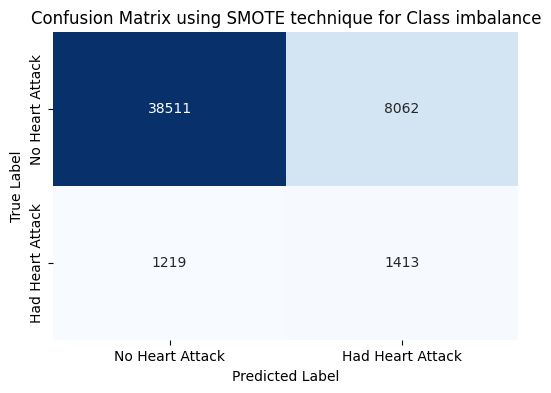

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_smote, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix using SMOTE technique for Class imbalance')
plt.show()


* The accuracy after applying SMOTE technique seems a bit lower. If we look closely at the precision values for HeartAttack yes cases it seems lower than the previous case.

* Hence the model with class_weighted=balance is better than all other models.

## **Random Forest Classifier**

In [182]:
df_final.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'BMI', 'Sex',
       'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
       'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
       'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')

### **Random_Forest with class imbalance - Model_1**

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_rc = df_final.drop('HadHeartAttack',axis=1)
y_rc = df_final['HadHeartAttack']
scaler = MinMaxScaler()
X_train_rc,X_test_rc,y_train_rc,y_test_rc = train_test_split(X_rc,y_rc,test_size=0.2,random_state=42)
X_train_rc[numerical_columns_updated] = scaler.fit_transform(X_train_rc[numerical_columns_updated])
X_test_rc[numerical_columns_updated] = scaler.transform(X_test_rc[numerical_columns_updated])

model=RandomForestClassifier(random_state=42)

model.fit(X_train_rc,y_train_rc)
y_pred = model.predict(X_test_rc)

accuracy_score = accuracy_score(y_test_rc,y_pred)
print('Accuracy: ',accuracy_score)
print("Classification Report:\n", classification_report(y_test_rc, y_pred))

Accuracy:  0.9489482776140636
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.57      0.19      0.29      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.59      0.63     49205
weighted avg       0.94      0.95      0.94     49205



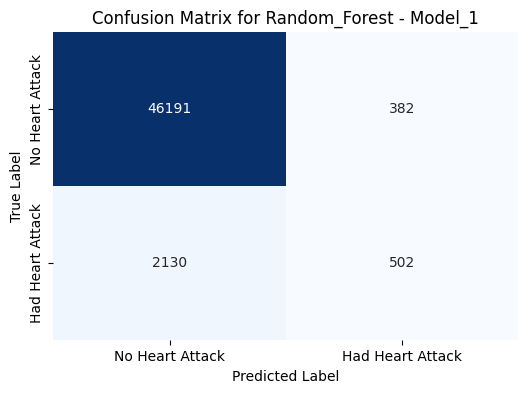

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_rc, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random_Forest - Model_1')
plt.show()


### **RandomForest with Class_weighted=balance - Model_2**

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the dataset into features (X_rc) and target (y_rc)
X_rc = df_final.drop('HadHeartAttack', axis=1)
y_rc = df_final['HadHeartAttack']

# Scaling numerical features
scaler = MinMaxScaler()
X_train_rc, X_test_rc, y_train_rc, y_test_rc = train_test_split(X_rc, y_rc, test_size=0.2, random_state=42)
X_train_rc[numerical_columns_updated] = scaler.fit_transform(X_train_rc[numerical_columns_updated])
X_test_rc[numerical_columns_updated] = scaler.transform(X_test_rc[numerical_columns_updated])

# Handling class imbalance using class_weight='balanced'
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train_rc, y_train_rc)

# Make predictions
y_pred = model.predict(X_test_rc)

# Calculate and print the accuracy and classification report
accuracy = accuracy_score(y_test_rc, y_pred)
print('Accuracy: ', accuracy)
print("Classification Report:\n", classification_report(y_test_rc, y_pred))


Accuracy:  0.9479321207194391
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     46573
           1       0.56      0.12      0.20      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.56      0.59     49205
weighted avg       0.93      0.95      0.93     49205



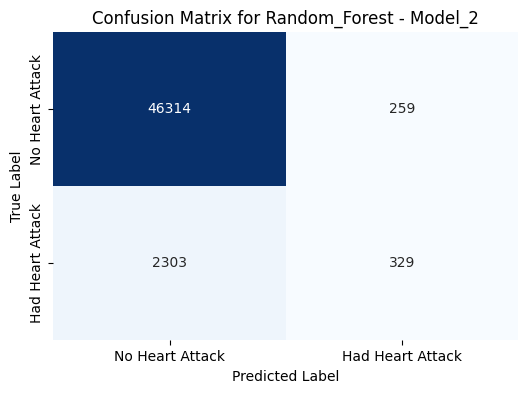

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_rc, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random_Forest - Model_2')
plt.show()


## **Random Forest with SMOTE technique for class balance - Model_3**

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Splitting the dataset into features (X_rc) and target (y_rc)
X_rc = df_final.drop('HadHeartAttack', axis=1)
y_rc = df_final['HadHeartAttack']

# Scaling numerical features
scaler = MinMaxScaler()
X_train_rc, X_test_rc, y_train_rc, y_test_rc = train_test_split(X_rc, y_rc, test_size=0.2, random_state=42)

# Scale the numerical columns
X_train_rc[numerical_columns_updated] = scaler.fit_transform(X_train_rc[numerical_columns_updated])
X_test_rc[numerical_columns_updated] = scaler.transform(X_test_rc[numerical_columns_updated])

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_rc, y_train_rc)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model on the SMOTE-balanced data
model.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
y_pred = model.predict(X_test_rc)

# Calculate and print the accuracy and classification report
accuracy = accuracy_score(y_test_rc, y_pred)
print('Accuracy: ', accuracy)
print("Classification Report:\n", classification_report(y_test_rc, y_pred))


Accuracy:  0.9325068590590387
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     46573
           1       0.38      0.40      0.39      2632

    accuracy                           0.93     49205
   macro avg       0.67      0.68      0.68     49205
weighted avg       0.93      0.93      0.93     49205



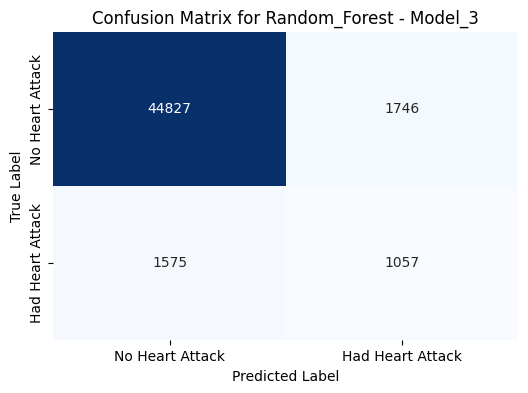

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_rc, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random_Forest - Model_3')
plt.show()


* Both Model_1 and Model_2 have similar accuracy (around 95%) but perform poorly on the minority class (class 1). Despite high precision for class 1 (around 0.56), their low recall (especially the second model with recall as low as 0.12) means they are missing a lot of actual heart attack cases.
These models seem to prioritize overall accuracy, likely due to the heavy class imbalance, and are biased towards predicting class 0 correctly.

* Model_3 has slightly lower accuracy (93%), but performs better on class 1 with more balanced precision and recall. Although it's less accurate overall, it offers a better trade-off between precision and recall for heart attack predictions.

* Since predicting HeartAttacks is critical  our model_3 is a better choice despite its lower accuracy as it shows more balanced performance.

## XGBoost Model

In [186]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_g = df_final.drop('HadHeartAttack', axis=1)
y_g = df_final['HadHeartAttack']

# Scaling the numerical columns
scaler = MinMaxScaler()
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, test_size=0.2, random_state=42)
X_train_g[numerical_columns_updated] = scaler.fit_transform(X_train_g[numerical_columns_updated])
X_test_g[numerical_columns_updated] = scaler.transform(X_test_g[numerical_columns_updated])

# Using XGBoost classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fitting the model
model.fit(X_train_g, y_train_g)

# Making predictions
y_pred = model.predict(X_test_g)

# Evaluating the model
accuracy = accuracy_score(y_test_g, y_pred)
print('Accuracy: ', accuracy)
print("Classification Report XG Boost:\n", classification_report(y_test_g, y_pred))


Accuracy:  0.9485824611319987
Classification Report XG Boost:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.54      0.24      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



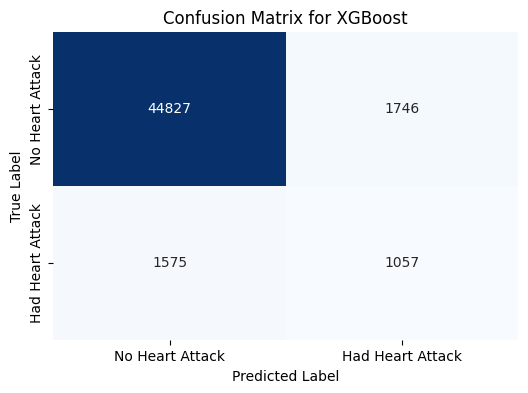

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_g, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()


### XGBoost with Cross Validation

In [187]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting features and target
X_g = df_final.drop('HadHeartAttack', axis=1)
y_g = df_final['HadHeartAttack']

# Scaling the numerical columns
scaler = MinMaxScaler()
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, y_g, test_size=0.2, random_state=42)
X_train_g[numerical_columns_updated] = scaler.fit_transform(X_train_g[numerical_columns_updated])
X_test_g[numerical_columns_updated] = scaler.transform(X_test_g[numerical_columns_updated])

# Using XGBoost classifier
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Cross-validation
cv_scores = cross_val_score(model, X_train_g, y_train_g, cv=5, scoring='accuracy')

print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Accuracy: ", cv_scores.mean())

# Fitting the model
model.fit(X_train_g, y_train_g)

# Making predictions
y_pred = model.predict(X_test_g)

# Evaluating the model
accuracy = accuracy_score(y_test_g, y_pred)
print('Test Accuracy: ', accuracy)
print("Classification Report XGBoost:\n", classification_report(y_test_g, y_pred))


Cross-Validation Scores:  [0.94779494 0.94840463 0.94642177 0.94708229 0.94695526]
Mean Cross-Validation Accuracy:  0.9473317775597734
Test Accuracy:  0.9485824611319987
Classification Report XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.54      0.24      0.33      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.61      0.65     49205
weighted avg       0.94      0.95      0.94     49205



* The Cross validation does not give any change in the outputs of our model nor does it improve it .

### XG Boost with balancing the class

In [188]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_bg = df_final.drop('HadHeartAttack', axis=1)
y_bg = df_final['HadHeartAttack']

scaler = MinMaxScaler()
X_train_bg, X_test_bg, y_train_bg, y_test_bg = train_test_split(X_bg, y_bg, test_size=0.2, random_state=42)
X_train_bg[numerical_columns_updated] = scaler.fit_transform(X_train_bg[numerical_columns_updated])
X_test_bg[numerical_columns_updated] = scaler.transform(X_test_bg[numerical_columns_updated])

Attack_no = sum(y_train_bg == 0)
Attack_yes = sum(y_train_bg == 1)

scale_weight = Attack_no/Attack_yes

model  = XGBClassifier(random_state=42, scale_pos_weight=scale_weight,eval_metric='logloss',use_label_encoder=False)
model.fit(X_train_bg,y_train_bg)
y_pred = model.predict(X_test_bg)

accuracy = accuracy_score(y_test_bg,y_pred)
print('Accuracy: ',accuracy)
print("Classification Report XG Boost with Class balanced using Scale_weight:\n", classification_report(y_test_bg, y_pred))

Accuracy:  0.8500355654913119
Classification Report XG Boost with Class balanced using Scale_weight:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92     46573
           1       0.22      0.71      0.34      2632

    accuracy                           0.85     49205
   macro avg       0.60      0.79      0.63     49205
weighted avg       0.94      0.85      0.88     49205



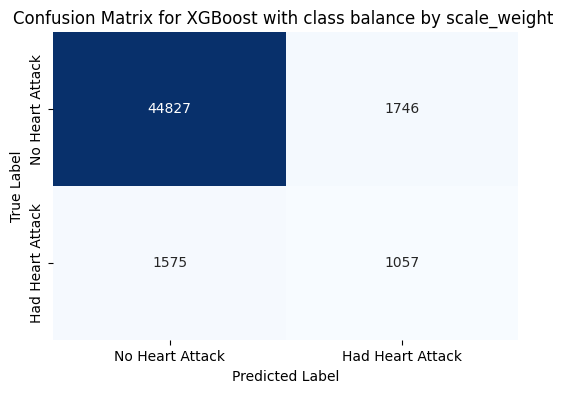

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_bg, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost with class balance by scale_weight ')
plt.show()


### XGBoost with SMOTE for Class Balance

In [202]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_sbg = df_final.drop('HadHeartAttack', axis=1)
y_sbg = df_final['HadHeartAttack']

scaler = MinMaxScaler()
X_train_sbg, X_test_sbg, y_train_sbg, y_test_sbg = train_test_split(X_sbg, y_sbg, test_size=0.2, random_state=42)
X_train_sbg[numerical_columns_updated] = scaler.fit_transform(X_train_sbg[numerical_columns_updated])
X_test_sbg[numerical_columns_updated] = scaler.transform(X_test_sbg[numerical_columns_updated])

smote = SMOTE(random_state=42)
X_train_sbg, y_train_sbg = smote.fit_resample(X_train_sbg, y_train_sbg)

# Using XGBoost classifier
model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Fitting the model on SMOTE-resampled data
model.fit(X_train_sbg, y_train_sbg)

# Making predictions
y_pred = model.predict(X_test_sbg)

# Evaluating the model
accuracy = accuracy_score(y_test_sbg, y_pred)
print('Accuracy: ', accuracy)
print("Classification Report XGBoost class balanced using SMOTE:\n", classification_report(y_test_sbg, y_pred))

Accuracy:  0.9352504826745249
Classification Report XGBoost class balanced using SMOTE:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     46573
           1       0.38      0.35      0.36      2632

    accuracy                           0.94     49205
   macro avg       0.67      0.66      0.66     49205
weighted avg       0.93      0.94      0.93     49205



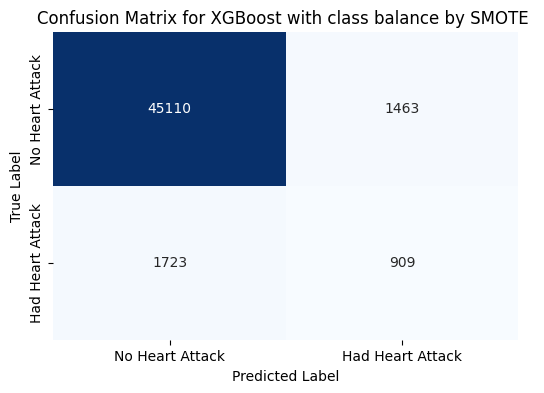

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test_sbg, y_pred)

# Plotting confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Heart Attack', 'Had Heart Attack'], yticklabels=['No Heart Attack', 'Had Heart Attack'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost with class balance by SMOTE ')
plt.show()


* Since recall is more important (i.e., identifying as many heart attack cases as possible): The XGBoost model with scale_pos_weight is the best, as it has the highest recall (0.71).

* If overall balance is important (accuracy, precision, and recall): The XGBoost model with SMOTE is a good option, as it has better balance between precision and recall for the minority class (Heart Attack = Yes).

For heart attack identification, XGBoost with scale_pos_weight provides the best recall, making it ideal if missing heart attack cases is a bigger concern.